In [1]:
# Uncomment the command below if you run this script separately. 

%run AnalysisFunctions.ipynb
apply_filter = "False"

C:\Users\hamda\AppData\Local\Temp\ipykernel_36568\1198573690.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ground_truth_depmap_hit = ground_truth_depmap_hit.replace({True: 1, False: 0})


In [2]:
#filtered = ""

In [3]:
print("Running Ito Analysis")


print(f"Apply Filter?: {apply_filter}")

if apply_filter.lower() == "true":
    filtered = "/Filtered"
    print("Compiling results with filtered pairs")
else:
    filtered = ""
    print("Compiling results with unfiltered pairs")


Running Ito Analysis
Apply Filter?: False
Compiling results with unfiltered pairs


In [4]:
## This screen has some inconsistences with the gene names, so convert them to Entrez ID before analysis.

def Convert_Symbols_to_Entrez(entrez_dict, df):
    df = reindex_alphbetically(df)
    df = df.rename_axis('GENE')
    df = df.reset_index()
    df[['gene1', 'gene2']] = df['GENE'].str.split('_', expand=True)
    df['gene1_Entrez_ID'] = df['gene1'].map(entrez_dict)
    df['gene2_Entrez_ID'] = df['gene2'].map(entrez_dict)

    missing = df[df['gene1_Entrez_ID'].isna() | df['gene2_Entrez_ID'].isna()].shape
    print("missing:")
    print(missing)
    
    df['gene_pair']  = df['gene1_Entrez_ID']+ "_" + df['gene2_Entrez_ID']
    df = df.set_index('gene_pair')
    df = df.drop(columns = ['gene1','gene2','gene1_Entrez_ID','gene2_Entrez_ID', 'GENE'])
    
    df = df[df.index.notna()]
    return(df)

In [5]:
# Gene name to Entrez ID data dowloaded from https://www.genenames.org/
dtype_specification = {'NCBI Gene ID': str}
genenames = pd.read_csv('../InputData/genenames.txt', delimiter = "\t",
                        dtype=dtype_specification)
genenames

genenames = genenames[['Approved symbol', 'NCBI Gene ID']]
genenames = genenames.rename(columns = {'NCBI Gene ID':'Entrez ID'})

genenames = genenames.dropna(subset=['Entrez ID'])


entrez_dict = dict(zip(genenames['Approved symbol'], genenames['Entrez ID']))


In [6]:
ground_truth_depmap_hit_entrez = Convert_Symbols_to_Entrez(entrez_dict, ground_truth_depmap_hit)
Koferle_entrez = Convert_Symbols_to_Entrez(entrez_dict, Koferle)
Bacon_entrez = Convert_Symbols_to_Entrez(entrez_dict, bacon)

missing:
(26, 6)
missing:
(1469, 6)
missing:
(10, 6)


In [7]:
# zdLFC doesnt drop ny pairs so filtered or unfiltered doesnt make a difference 
zdLFC = pd.read_csv("../zdLFC Scripts/zdLFC Output/ITO.csv")
zdLFC = pd.read_csv("C:\\Users\\Hamda\\OneDrive\\Documents\\GitHub\\PostDoc\\Conway\\Research\\GIScoring\\Hamda's Work\\zdLFC\\zdLFC_Output\\ITO.csv")
zdLFC = zdLFC.rename(columns={zdLFC.columns[0]: 'gene_pair'})
zdLFC = zdLFC.set_index('gene_pair')
#zdLFC
zdLFC = Convert_Symbols_to_Entrez(entrez_dict, zdLFC)
zdLFC = zdLFC * -1
zdLFC ## missing are due to entrez mapping, not due to score

missing:
(104, 16)


Meljuso   GI1_004  MEL202_003       PK1      MEWO  \
gene_pair                                                              
127550_28        -0.140825  0.185618   -0.608270 -0.075492 -0.999869   
127550_26301     -0.799537 -0.133986   -1.310639  0.316279 -1.161242   
127550_360203    -0.204638 -0.021932   -0.825974  0.226692 -0.257550   
28_26301         -1.220497 -0.278938   -0.910098 -0.591951 -0.929213   
28_360203        -0.448619 -0.051253   -0.219624 -0.316129  0.148738   
...                    ...       ...         ...       ...       ...   
9550_100532737   -1.915006  0.699969    1.268442 -1.936216 -1.212629   
9550_127124      -1.653704  0.033045    1.161602 -2.609435 -1.236395   
100532737_127124 -0.264456 -0.356914   -0.879407  0.171680 -0.809023   
534_100532737    -0.118832 -1.353720   -1.115467 -0.354115 -0.852423   
534_127124       -0.336969 -2.469202   -1.142580 -0.453643 -1.528178   

                    HS944T    IPC298      A549      HSC5    HS936T  PATU8988S  
gene_pair                                                                      
127550_28         0.186228 -0.621401 -1.477406 -0.482024 -0.467853   0.009664  
127550_26301     -0.148810  0.241038 -1.442006 -0.966367 -0.322334  -0.834030  
127550_360203    -0.041823 -0.681757 -0.646758  0.141689 -0.409773  -0.444986  
28_26301          0.324116 -0.165222 -0.324962 -0.632563 -1.143050  -0.821641  
28_360203         0.745966 -0.833978 -0.054062  0.439164 -0.796077  -0.222335  
...                    ...       ...       ...       ...       ...        ...  
9550_100532737    0.041208 -0.731702 -0.014848 -0.049683  1.227716  -2.172902  
9550_127124       1.841733 -1.625707  0.492700  0.290799  0.426634  -0.974985  
100532737_127124 -0.775689 -1.185992 -0.279938 -0.689580 -1.067024  -0.210300  
534_100532737    -1.675304 -1.071759 -0.613774 -1.158176  0.269564   0.050977  
534_127124       -0.003230 -2.036010 -0.685601  0.256045 -1.465162  -0.585053  

[4961 rows x 11 columns]

In [8]:
orthrus = pd.read_csv("../Orthrus Scripts/OrthrusOutput" + filtered + "/ito_orthrus.tsv", sep='\t')
#display(orthrus)
orthrus = orthrus.filter(like='differential', axis=1) \
                    .join(orthrus.filter(items=['gene1','gene2']))
orthrus.columns = orthrus.columns.str.replace('differential_combn_vs_single_', '')

orthrus['gene_pair'] = orthrus['gene1'] + "_" +orthrus['gene2']
orthrus = orthrus.set_index('gene_pair')
orthrus.drop(columns = ['gene1', 'gene2'], inplace = True)
orthrus = Convert_Symbols_to_Entrez(entrez_dict, orthrus)
#count_nan_rows = a.index.isna().sum()
#count_nan_rows # 104 rows are missing
orthrus = orthrus * -1
orthrus

missing:
(104, 16)


Meljuso       GT1  MEL202_203       PK1      MEWO  \
gene_pair                                                              
127550_28         0.234884  0.581396    0.381489  0.462864  0.328285   
127550_26301      0.200905  0.387087    0.324737  0.439806  0.312819   
127550_360203     0.225611  0.580075    0.404435  0.512747  0.448660   
28_26301          0.096465  0.488522    0.383091  0.146610  0.379611   
28_360203         0.197326  0.560127    0.516766  0.385046  0.538968   
...                    ...       ...         ...       ...       ...   
9550_100532737    0.338764  0.524957    0.435738  0.284003  0.513682   
9550_127124       0.083898  0.266038    0.293479  0.107073  0.402459   
100532737_127124  0.229871  0.402084    0.444282  0.512191  0.350562   
534_100532737     0.302918  0.176829    0.282670  0.272945  0.387340   
534_127124        0.179147 -0.117594    0.284028  0.380747  0.260829   

                    HS944T    IPC298      A549      HSC5    HS936T  PATU8988S  
gene_pair                                                                      
127550_28         0.666474  0.581802 -0.102198  0.516211  0.416605   0.428513  
127550_26301      0.596756  0.778586 -0.022102  0.359758  0.478545   0.302498  
127550_360203     0.568901  0.539005  0.087830  0.518853  0.524618   0.323245  
28_26301          0.641317  0.697824  0.093859  0.454375  0.305828   0.356659  
28_360203         0.757353  0.412483  0.161095  0.547637  0.286872   0.462262  
...                    ...       ...       ...       ...       ...        ...  
9550_100532737    0.574558  0.445062  0.177295  0.332260  0.739101   0.301535  
9550_127124       0.700781 -0.149786  0.127772  0.276203 -0.016928   0.159784  
100532737_127124  0.494979  0.343007  0.157385  0.433677  0.303186   0.333639  
534_100532737     0.291365  0.402181  0.048725  0.323062  0.660094   0.482380  
534_127124        0.611250  0.166997  0.088252  0.467201  0.165496   0.302667  

[4961 rows x 11 columns]

In [9]:
gemini_SensL = pd.read_csv("../Gemini Scripts/GeminiOutput" + filtered + "/Gemini_ITO_Sensitive.csv")
gemini_SensL.rename({'Unnamed: 0':'gene_pair'}, inplace = True, axis = 1)
gemini_SensL['gene_pair'] =gemini_SensL['gene_pair'].str.replace(';', '_')
gemini_SensL.set_index('gene_pair', inplace = True)
#display(gemini_SensL[gemini_SensL.isnull().any(axis=1)])

gemini_SensL = Convert_Symbols_to_Entrez(entrez_dict, gemini_SensL)




missing:
(104, 16)


In [10]:
gemini_Strong = pd.read_csv("../Gemini Scripts/GeminiOutput" + filtered + "/Gemini_ITO_Strong.csv")
gemini_Strong.rename({'Unnamed: 0':'gene_pair'}, inplace = True, axis = 1)
gemini_Strong['gene_pair'] =gemini_Strong['gene_pair'].str.replace(';', '_')
gemini_Strong.set_index('gene_pair', inplace = True)
gemini_Strong = Convert_Symbols_to_Entrez(entrez_dict, gemini_Strong)

gemini_Strong

missing:
(104, 16)


Meljuso   GI1_004  MEL202_003       PK1      MEWO  \
gene_pair                                                              
127550_28        -0.137329  0.299715   -0.077458  0.132501 -0.073534   
127550_26301     -0.032557  0.348611   -0.150396  0.360829 -0.005041   
127550_360203    -0.105989  0.200752   -0.140968  0.366193  0.018274   
28_26301          0.031491  0.315029   -0.101636 -0.028224  0.049928   
28_360203        -0.002667  0.118884   -0.024823  0.281182  0.111317   
...                    ...       ...         ...       ...       ...   
9550_100532737   -0.612245 -0.443039   -0.588057 -2.135204 -0.203513   
9550_127124       0.004279 -0.705976   -1.182230 -2.224111  0.134274   
100532737_127124  0.108640  0.242691    0.325388 -0.007141  0.138185   
534_100532737    -0.230338  0.162688    0.170563 -0.211724  0.115584   
534_127124       -0.036416 -0.187847    0.106743 -0.014855  0.016166   

                    HS944T    IPC298      A549      HSC5    HS936T  PATU8988S  
gene_pair                                                                      
127550_28         0.024593  0.083927 -0.241323  0.218901  0.240917   0.118768  
127550_26301      0.234600  0.215332 -0.054765  0.363287  0.303613   0.197135  
127550_360203     0.079642  0.201932  0.062979  0.540686  0.138522   0.130981  
28_26301         -0.069752  0.195146  0.010470  0.402138  0.293863   0.221544  
28_360203         0.099192 -0.086002  0.177189  0.547080  0.134012   0.282741  
...                    ...       ...       ...       ...       ...        ...  
9550_100532737   -0.405845 -1.475710 -0.945189 -0.909281 -1.536460  -0.934251  
9550_127124      -0.465651 -1.902909 -0.733629 -0.979951 -2.000271  -0.540768  
100532737_127124  0.189544 -0.197118 -0.107890  0.309764  0.064931   0.066314  
534_100532737     0.001393 -0.141930 -0.340098  0.083777  0.180170   0.062710  
534_127124        0.094031 -0.061872 -0.182641  0.139414  0.161928   0.046895  

[4961 rows x 11 columns]

In [11]:
# Parrish doesnt drop any pairs either 
parrish_score = pd.read_csv('../Parrish Score Scripts/ParrishOutput/ito_parrish.csv')
parrish_score.set_index('paralog_pair', inplace=True)
parrish_score = Convert_Symbols_to_Entrez(entrez_dict, parrish_score)
parrish_score = parrish_score * -1
parrish_score

missing:
(104, 38)


GI_score_Meljuso  GI_score_GI1  GI_score_PK1  GI_score_MEWO  \
gene_pair                                                                       
127550_28                 0.119311      0.160640      0.134755      -0.127386   
127550_26301              0.084177     -0.029224      0.160313      -0.116434   
127550_360203             0.128699      0.147686      0.203142       0.035706   
28_26301                 -0.055387      0.037606     -0.163772      -0.067692   
28_360203                 0.110727      0.237109      0.045621       0.161183   
...                            ...           ...           ...            ...   
9550_100532737            0.360943      0.075263     -0.728002       0.063390   
9550_127124               0.107501     -0.022763     -0.539091       0.078326   
100532737_127124          0.131621     -0.027428      0.242260      -0.071519   
534_100532737             0.208079     -0.319520     -0.053905      -0.032214   
534_127124                0.106848     -0.659569      0.149442      -0.164620   

                  GI_score_HS944T  GI_score_IPC298  GI_score_A549  \
gene_pair                                                           
127550_28                0.156778         0.010582      -0.287052   
127550_26301             0.094209         0.226879      -0.212379   
127550_360203            0.058200        -0.043669      -0.069377   
28_26301                 0.122940         0.160528      -0.073148   
28_360203                0.268578        -0.203471      -0.004082   
...                           ...              ...            ...   
9550_100532737           0.061741        -0.421761      -0.066427   
9550_127124              0.343276        -0.874918       0.025079   
100532737_127124        -0.011192        -0.206709       0.056096   
534_100532737           -0.261449        -0.162541      -0.066858   
534_127124               0.165738        -0.420933      -0.055416   

                  GI_score_HSC5  GI_score_HS936T  GI_score_PATU8988S  ...  \
gene_pair                                                             ...   
127550_28              0.047000        -0.074562            0.103760  ...   
127550_26301          -0.125184        -0.048778           -0.028206  ...   
127550_360203          0.049528         0.032255            0.001590  ...   
28_26301              -0.052066        -0.225335            0.046058  ...   
28_360203              0.131289        -0.257113            0.178266  ...   
...                         ...              ...                 ...  ...   
9550_100532737        -0.162921         0.121529           -0.135272  ...   
9550_127124            0.124895        -0.157421           -0.095067  ...   
100532737_127124       0.017205        -0.224745            0.057041  ...   
534_100532737         -0.129492         0.175370            0.214708  ...   
534_127124             0.088761        -0.341003            0.004653  ...   

                  p_val_GI1  p_val_PK1  p_val_MEWO  p_val_HS944T  \
gene_pair                                                          
127550_28         -0.270151  -0.469098   -0.089989     -0.099143   
127550_26301      -0.853747  -0.304057   -0.087113     -0.419865   
127550_360203     -0.313459  -0.221979   -0.680927     -0.297115   
28_26301          -0.803144  -0.225959   -0.139387     -0.156788   
28_360203         -0.194100  -0.794557   -0.030924     -0.011799   
...                     ...        ...         ...           ...   
9550_100532737    -0.642746  -0.189521   -0.307822     -0.518064   
9550_127124       -0.889600  -0.208910   -0.302768     -0.002801   
100532737_127124  -0.783591  -0.052500   -0.103967     -0.889631   
534_100532737     -0.057157  -0.645379   -0.625258     -0.011378   
534_127124        -0.000143  -0.257025   -0.016449     -0.031786   

                  p_val_IPC298  p_val_A549  p_val_HSC5  p_val_HS936T  \
gene_pair                                                              
127550_28            -0.933482   -0

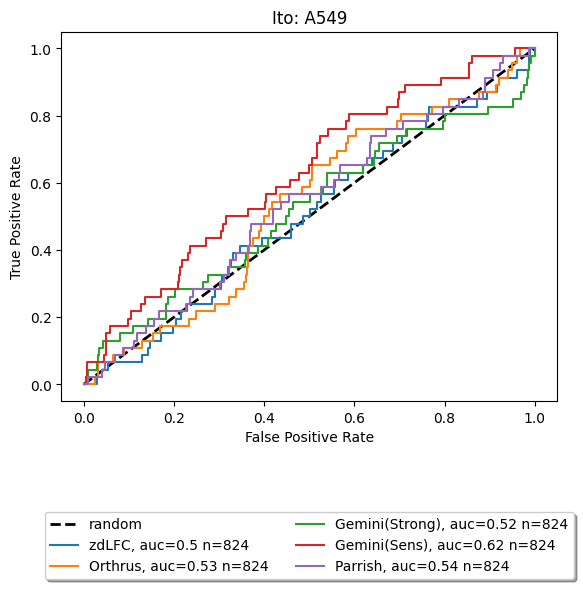

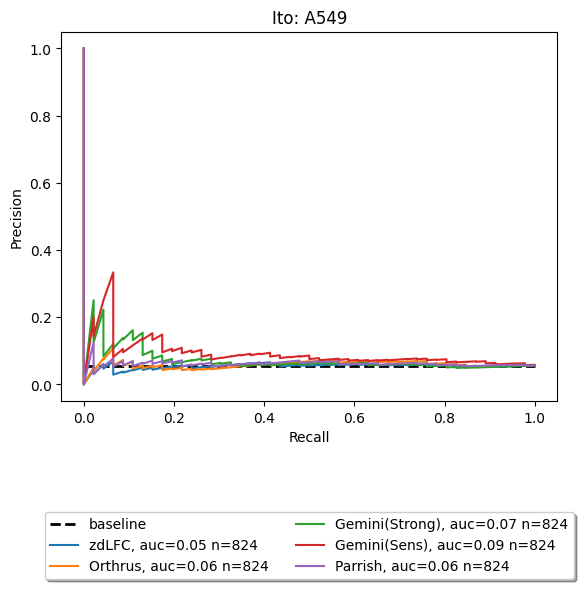

In [12]:
Ito_A549 = pd.concat([zdLFC['A549'],
                      orthrus['A549'],
                      gemini_Strong['A549'],
                      gemini_SensL['A549'],
                      parrish_score['GI_score_A549']
                      ], axis = 1, keys=scores)



results_ito_A549 = Cell_Line_Analysis(Ito_A549, 'A549', 'Ito', 
                   scores, ground_truth_depmap_hit_entrez)


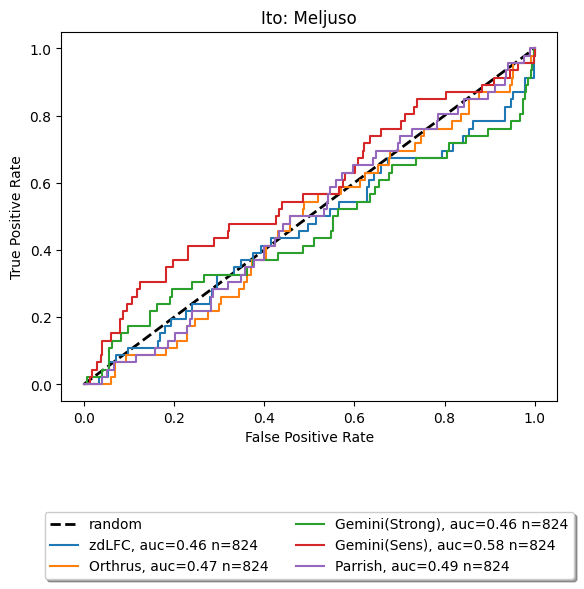

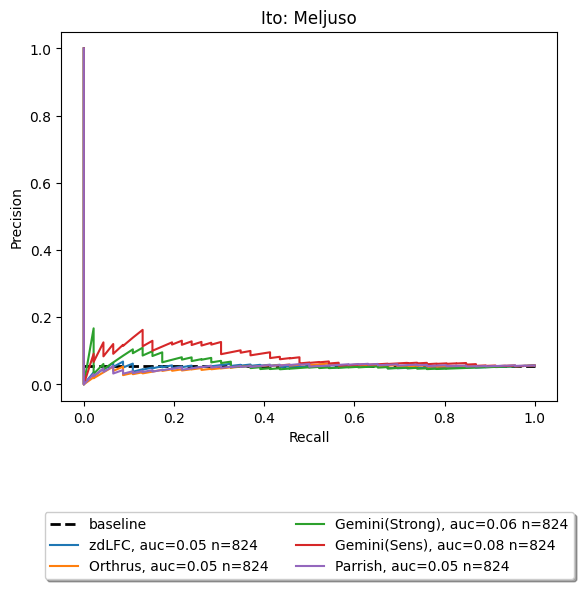

In [13]:
Ito_Meljuso = pd.concat([zdLFC['Meljuso'],
                      orthrus['Meljuso'],
                      gemini_Strong['Meljuso'],
                      gemini_SensL['Meljuso'],
                      parrish_score['GI_score_Meljuso']
                      ], keys= scores, axis = 1)


results_ito_Meljuso = Cell_Line_Analysis(Ito_Meljuso, 'Meljuso', 'Ito', 
                   scores, ground_truth_depmap_hit_entrez)


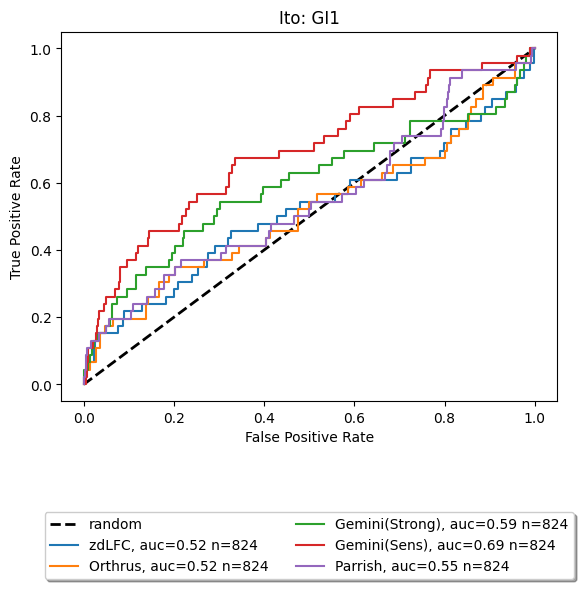

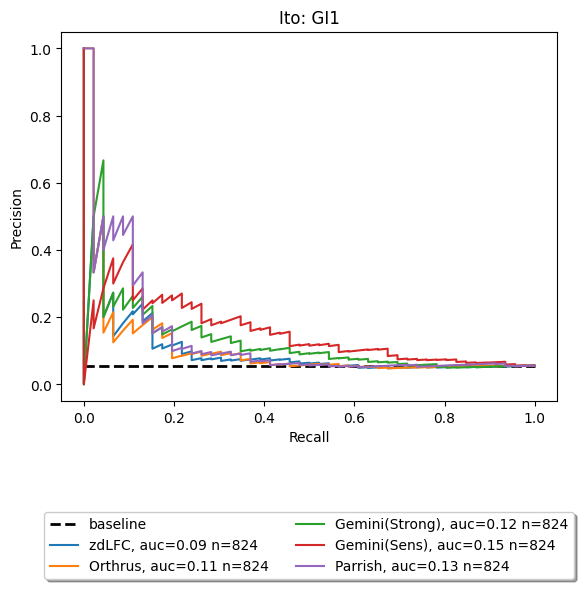

In [14]:
Ito_GI1 = pd.concat([zdLFC['GI1_004'],
                      orthrus['GT1'],
                      gemini_Strong['GI1_004'],
                      gemini_SensL['GI1_004'],
                      parrish_score['GI_score_GI1']

                      ], keys= scores, axis = 1)


results_ito_GI1 = Cell_Line_Analysis(Ito_GI1, 'GI1', 'Ito', 
                   scores, ground_truth_depmap_hit_entrez)


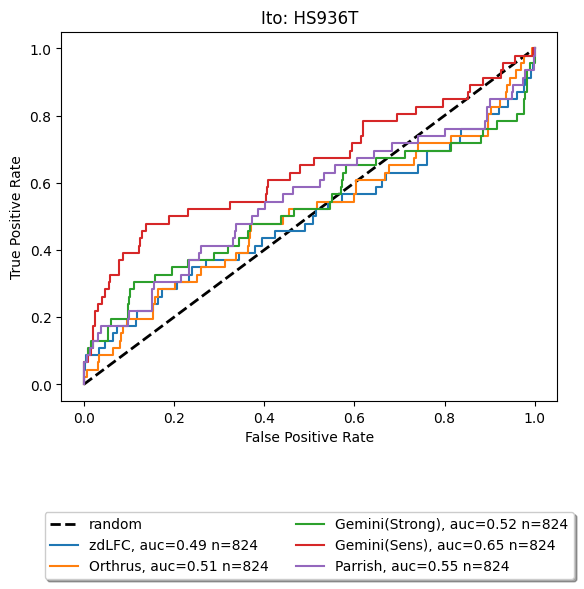

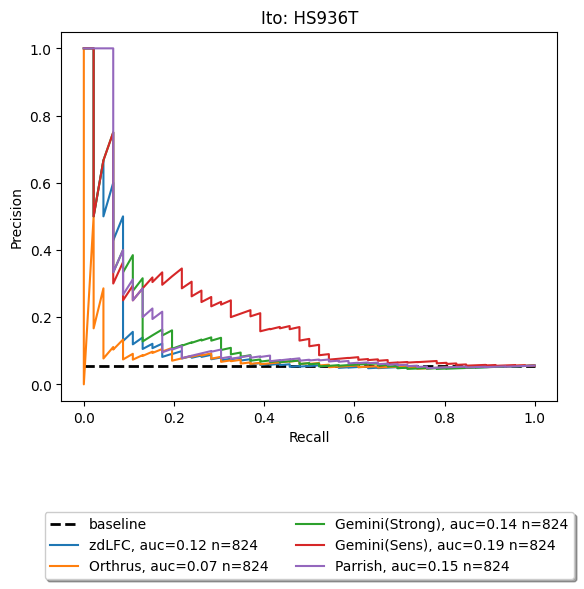

In [15]:
Ito_HS936T = pd.concat([zdLFC['HS936T'],
                      orthrus['HS936T'],
                      gemini_Strong['HS936T'],
                      gemini_SensL['HS936T'],
                      parrish_score['GI_score_HS936T']
                      ], keys= scores, axis = 1)


results_ito_HS936T = Cell_Line_Analysis(Ito_HS936T, 'HS936T', 'Ito', 
                   scores, ground_truth_depmap_hit_entrez)


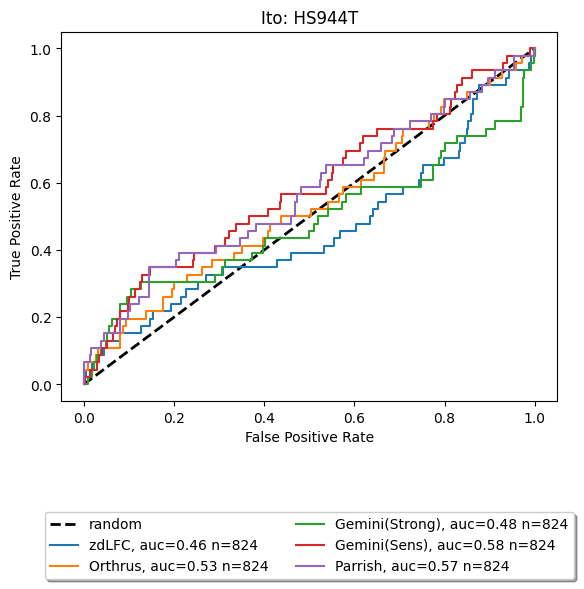

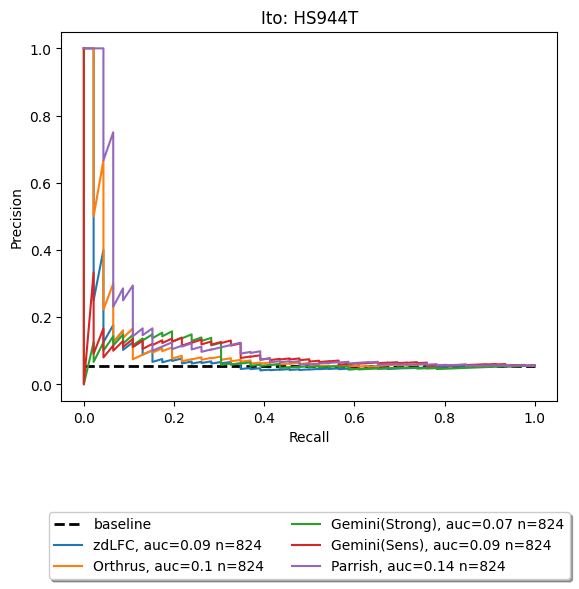

In [16]:
Ito_HS944T = pd.concat([zdLFC['HS944T'],
                      orthrus['HS944T'],
                      gemini_Strong['HS944T'],
                      gemini_SensL['HS944T'],
                      parrish_score['GI_score_HS944T']
                      ], keys= scores, axis = 1)


results_ito_HS944T = Cell_Line_Analysis(Ito_HS944T, 'HS944T', 'Ito', 
                   scores, ground_truth_depmap_hit_entrez)


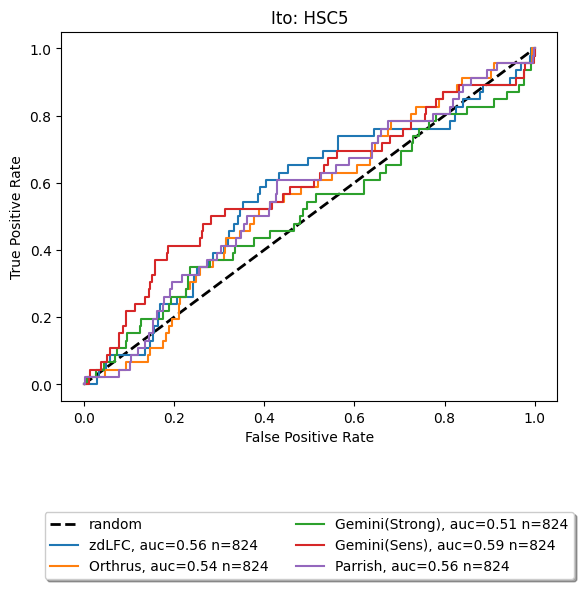

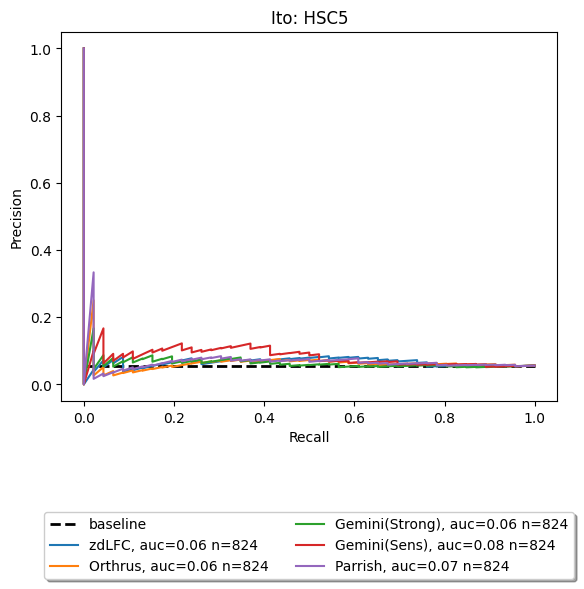

In [17]:
Ito_HSC5 = pd.concat([zdLFC['HSC5'],
                      orthrus['HSC5'],
                      gemini_Strong['HSC5'],
                      gemini_SensL['HSC5'],
                      parrish_score['GI_score_HSC5']
                      ], keys= scores, axis = 1)


results_ito_HSC5 = Cell_Line_Analysis(Ito_HSC5, 'HSC5', 'Ito', 
                   scores, ground_truth_depmap_hit_entrez)


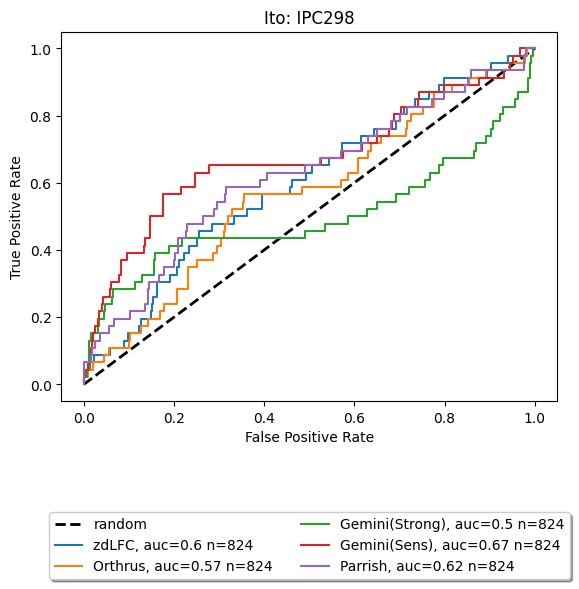

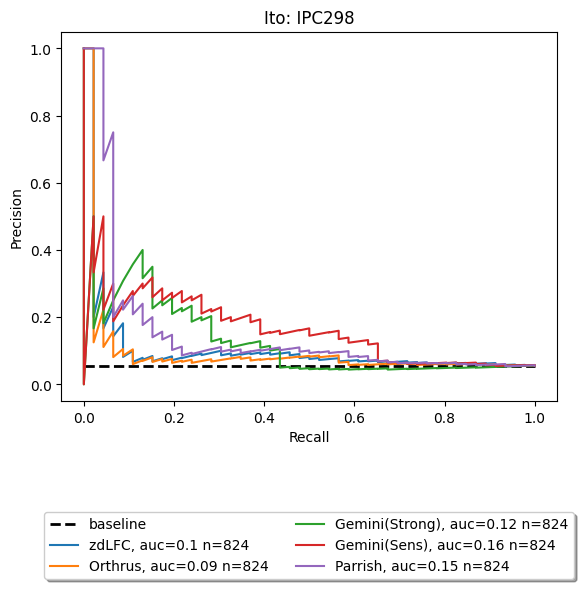

In [18]:
Ito_IPC298 = pd.concat([zdLFC['IPC298'],
                      orthrus['IPC298'],
                      gemini_Strong['IPC298'],
                      gemini_SensL['IPC298'],
                      parrish_score['GI_score_IPC298']
                      ], keys= scores, axis = 1)


results_ito_IPC298 = Cell_Line_Analysis(Ito_IPC298, 'IPC298', 'Ito', 
                   scores, ground_truth_depmap_hit_entrez)


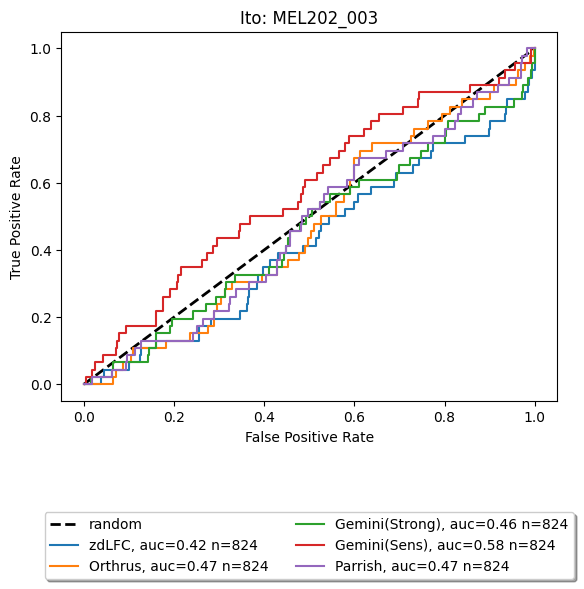

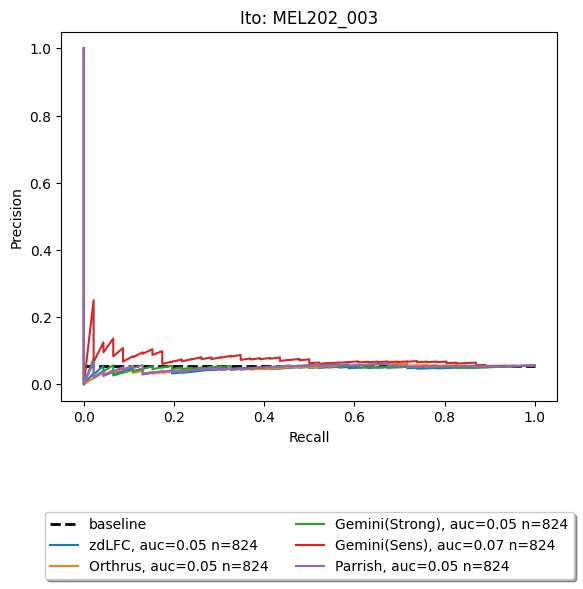

In [19]:
Ito_MEL202_003 = pd.concat([zdLFC['MEL202_003'],
                      orthrus['MEL202_203'],
                      gemini_Strong['MEL202_003'],
                      gemini_SensL['MEL202_003'],
                      parrish_score['GI_score_MEL202']
                      ], keys= scores, axis = 1)


results_ito_MEL202_003 = Cell_Line_Analysis(Ito_MEL202_003, 'MEL202_003', 'Ito', 
                   scores, ground_truth_depmap_hit_entrez)


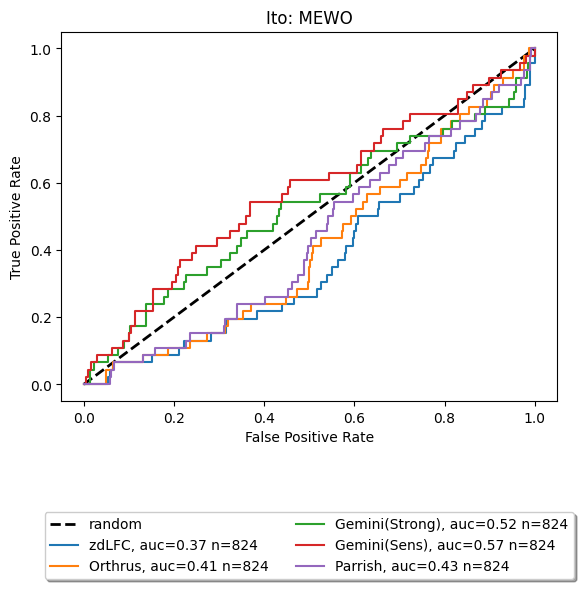

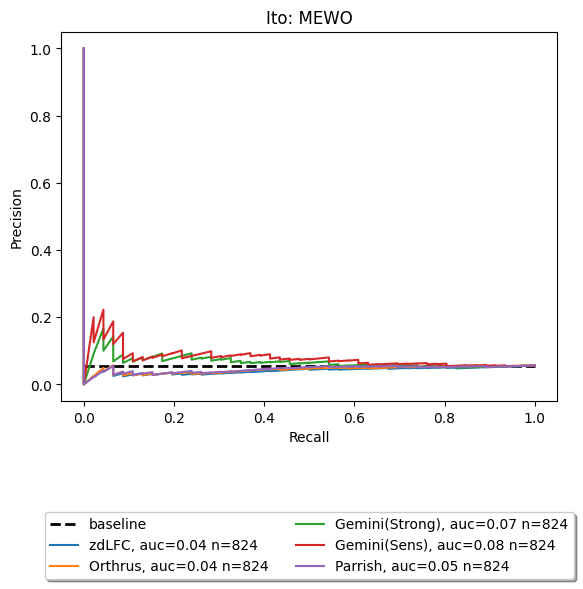

In [20]:
Ito_MEWO = pd.concat([zdLFC['MEWO'],
                      orthrus['MEWO'],
                      gemini_Strong['MEWO'],
                      gemini_SensL['MEWO'],
                      parrish_score['GI_score_MEWO']
                      ], keys= scores, axis = 1)


results_ito_MEWO = Cell_Line_Analysis(Ito_MEWO, 'MEWO', 'Ito', 
                   scores, ground_truth_depmap_hit_entrez)




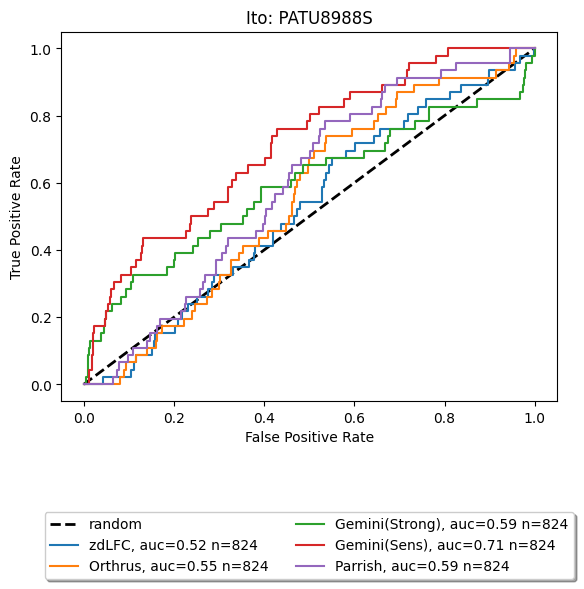

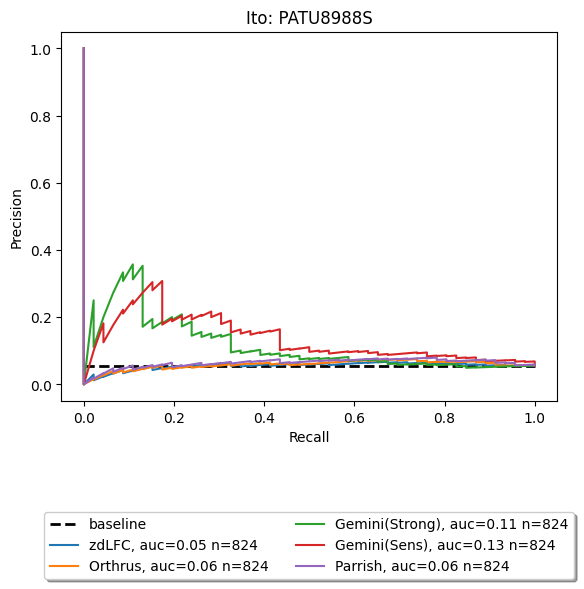

In [21]:
Ito_PATU8988S = pd.concat([zdLFC['PATU8988S'],
                      orthrus['PATU8988S'],
                      gemini_Strong['PATU8988S'],
                      gemini_SensL['PATU8988S'],
                      parrish_score['GI_score_PATU8988S']
                      ], keys= scores, axis = 1)


results_ito_PATU8988S = Cell_Line_Analysis(Ito_PATU8988S, 'PATU8988S', 'Ito', 
                   scores, ground_truth_depmap_hit_entrez)


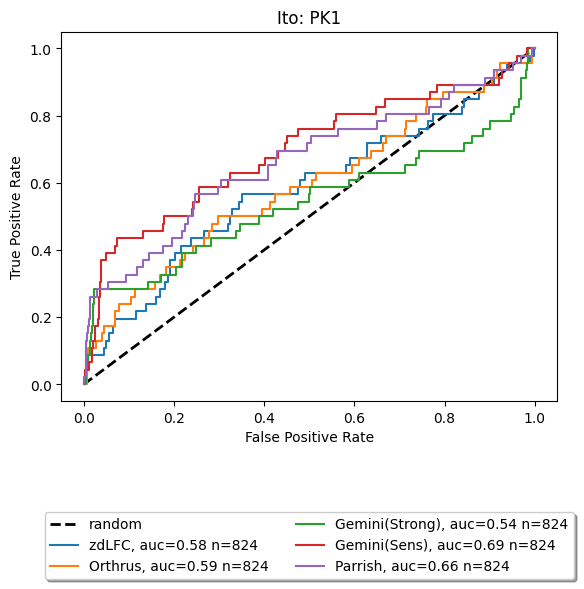

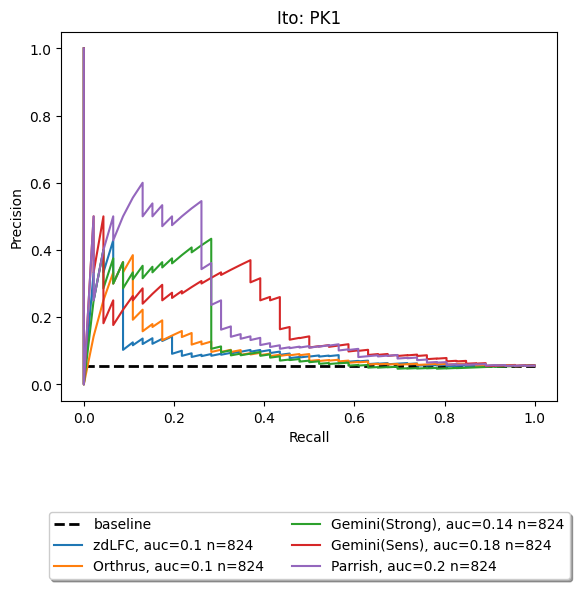

In [22]:
Ito_PK1 = pd.concat([zdLFC['PK1'],
                      orthrus['PK1'],
                      gemini_Strong['PK1'],
                      gemini_SensL['PK1'],
                      parrish_score['GI_score_PK1']
                      ], keys= scores, axis = 1)


results_ito_PK1 = Cell_Line_Analysis(Ito_PK1, 'PK1', 'Ito', 
                   scores, ground_truth_depmap_hit_entrez)


In [23]:
full_list = [results_ito_A549, results_ito_GI1, results_ito_HS936T,
             results_ito_HS944T, results_ito_HSC5, results_ito_IPC298,
             results_ito_MEL202_003, results_ito_Meljuso, results_ito_PATU8988S, results_ito_PK1, results_ito_MEWO]

roc, pr = ConvertResultsToDF(full_list )

## Write results to a file
roc.to_csv("Output" + filtered + "/Ito_ROC_DepMapHits.csv", index=False)
pr.to_csv("Output"  + filtered + "/Ito_PR_DepMapHits.csv", index=False)


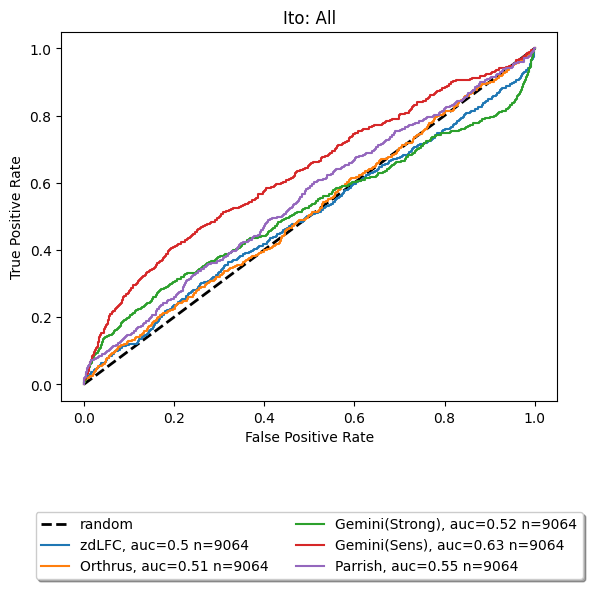

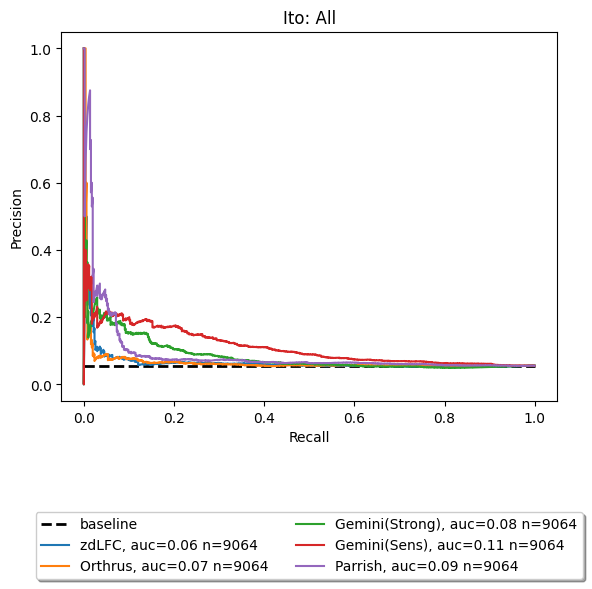

In [24]:
ito_all = pd.concat([Ito_A549, Ito_GI1, Ito_HS936T, 
                     Ito_HS944T, Ito_HSC5, Ito_IPC298, 
                     Ito_MEL202_003, Ito_Meljuso, Ito_MEWO, 
                     Ito_PATU8988S, Ito_PK1])
ito_all
results_ito_all = Cell_Line_Analysis(ito_all, 'All', 'Ito', scores, ground_truth_depmap_hit_entrez)
roc_all, pr_all = ConvertResultsToDF([results_ito_all] )
## Write results to a file
roc_all.to_csv("Output" + filtered + "/Ito_All_ROC_DepMapHits.csv", index=False)
pr_all.to_csv("Output" + filtered + "/Ito_All_PR_DepMapHits.csv", index=False)


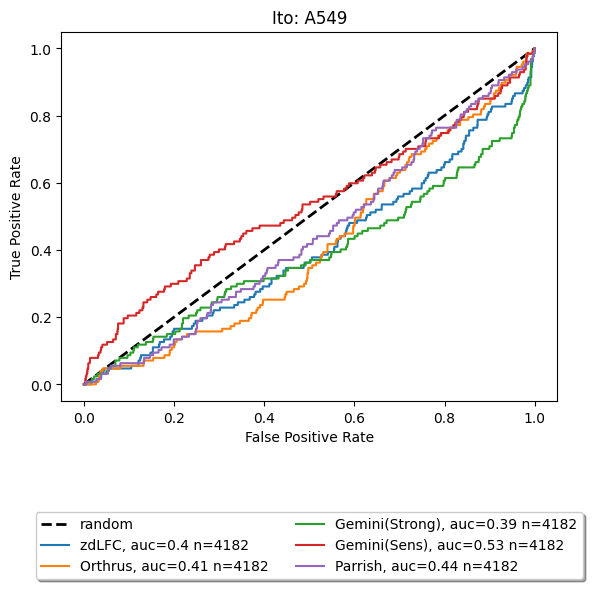

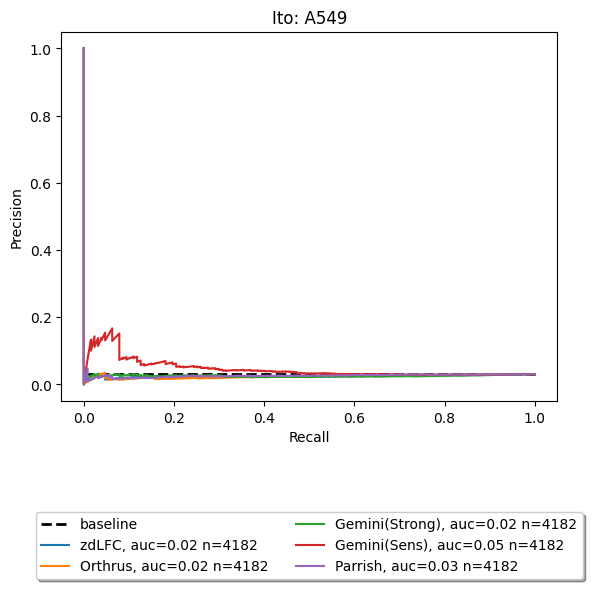

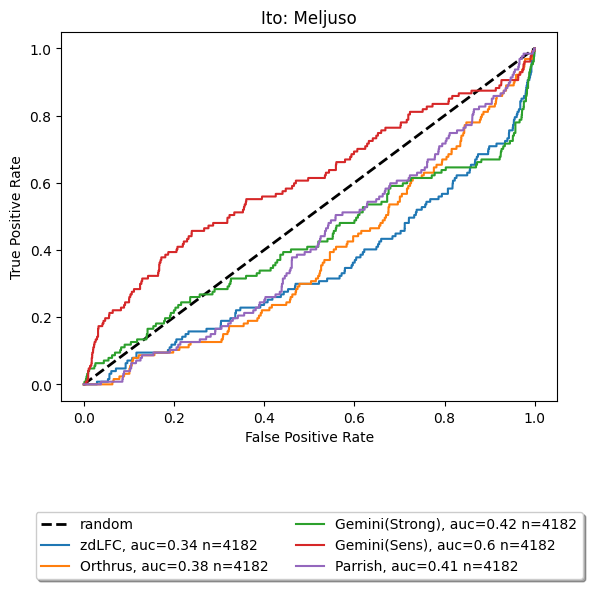

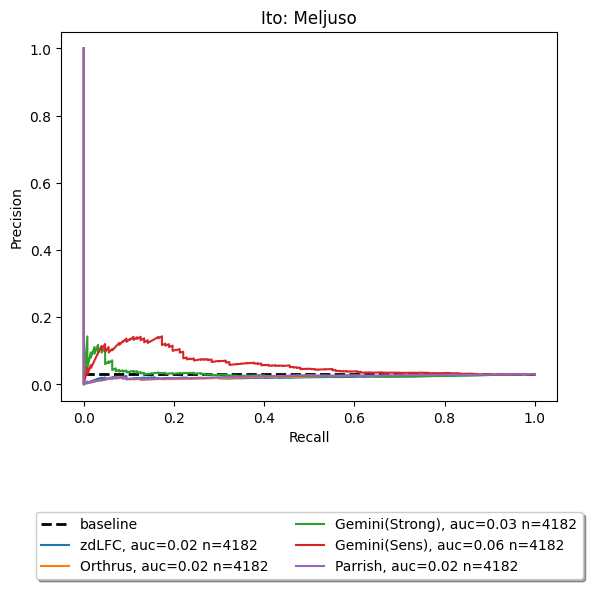

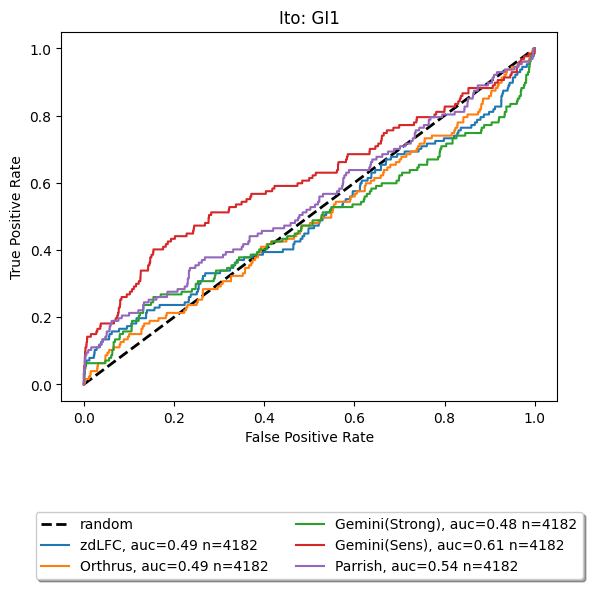

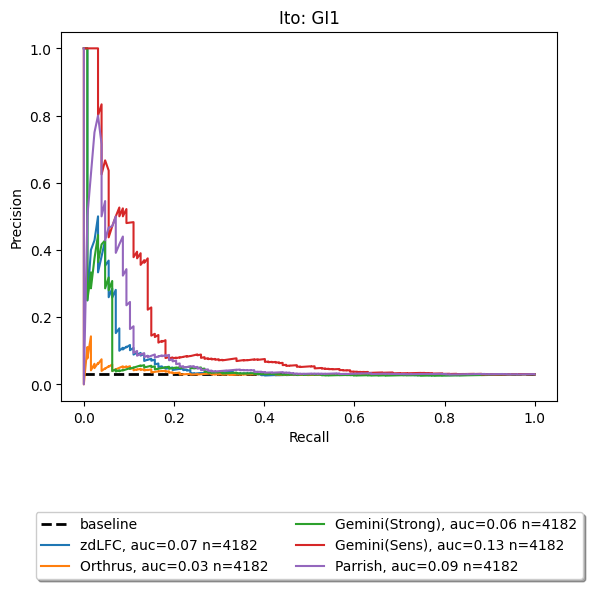

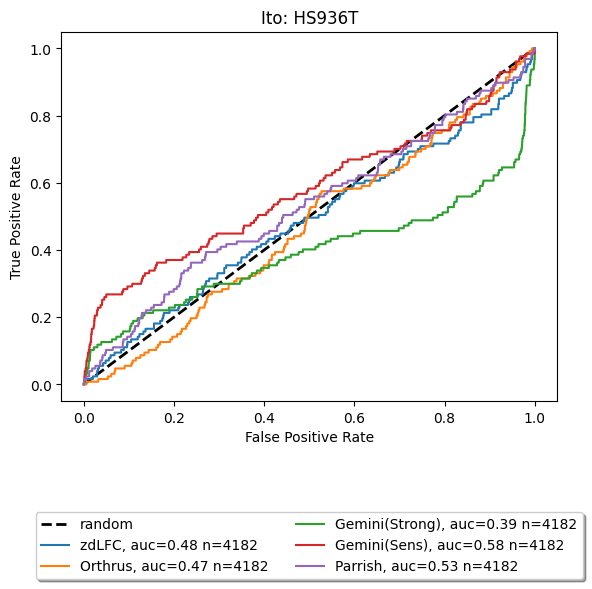

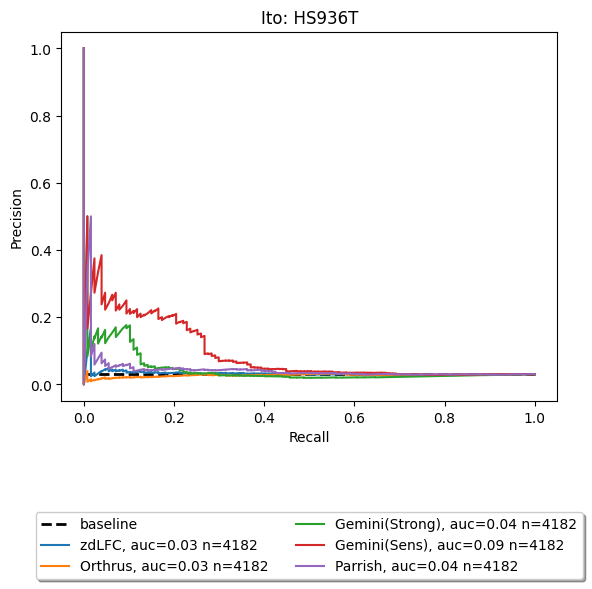

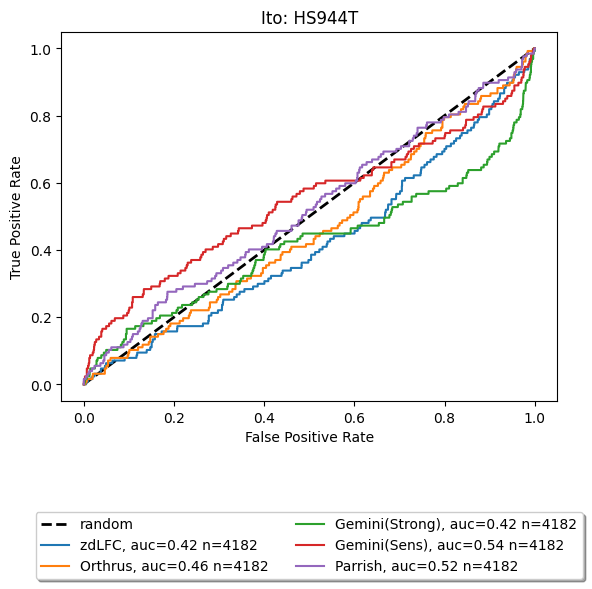

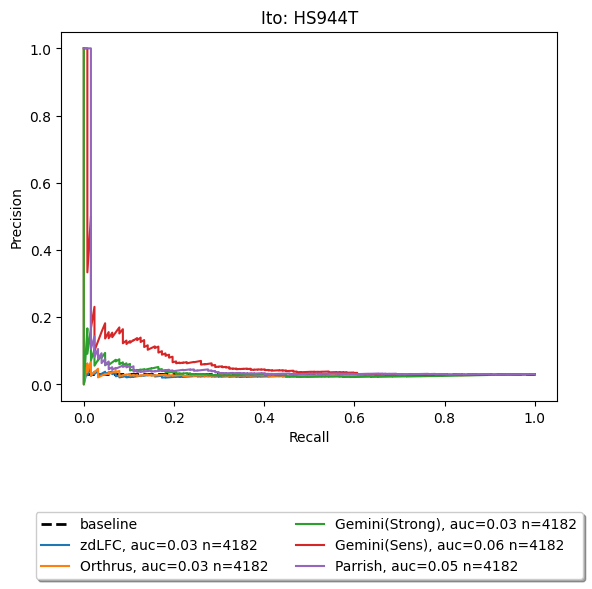

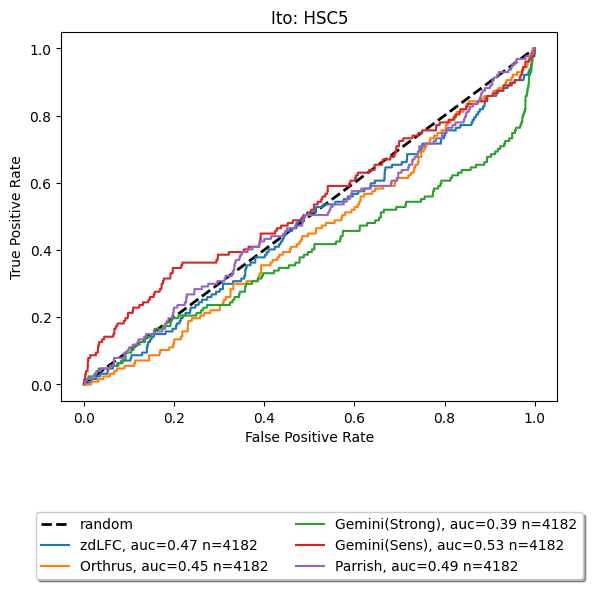

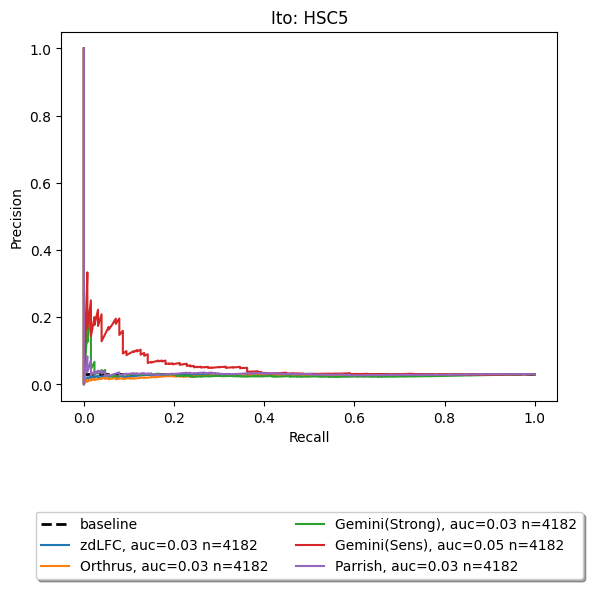

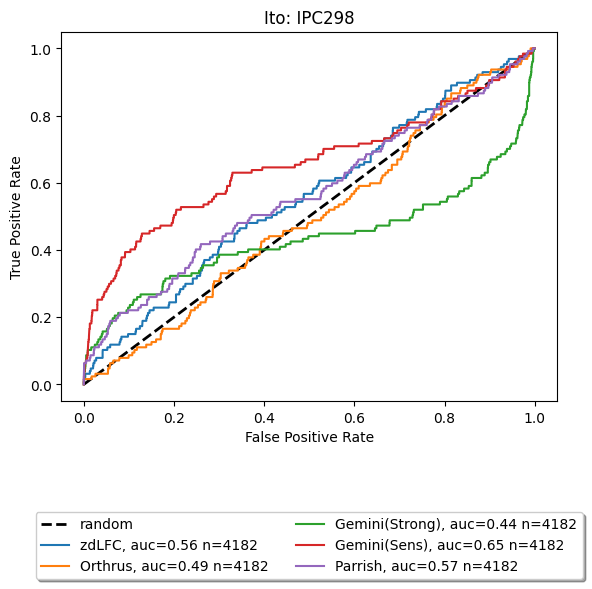

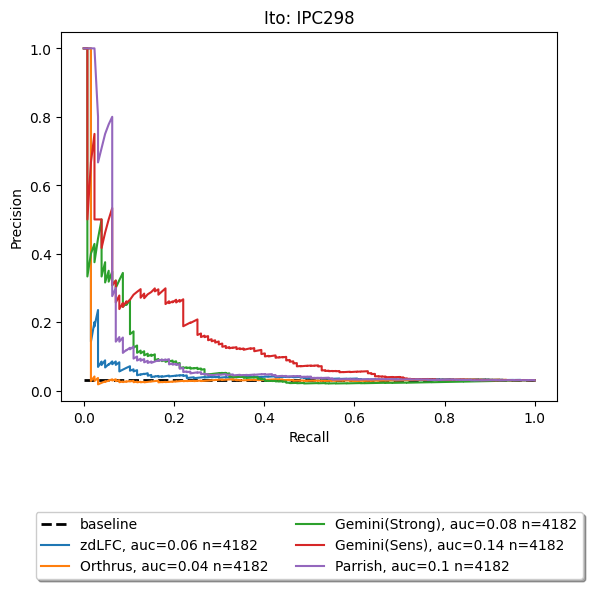

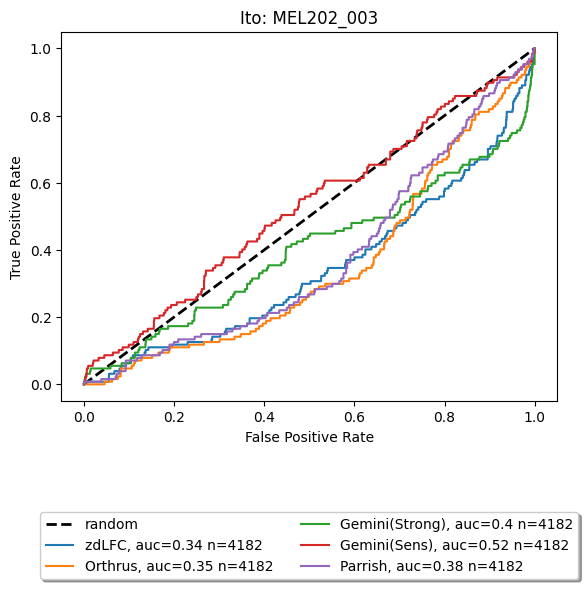

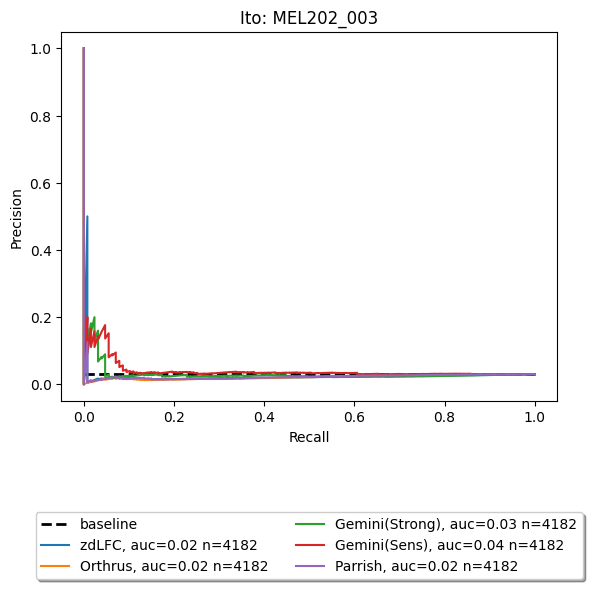

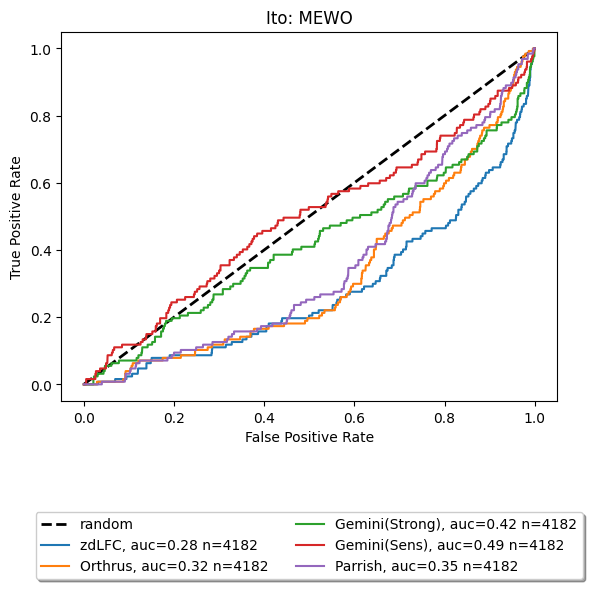

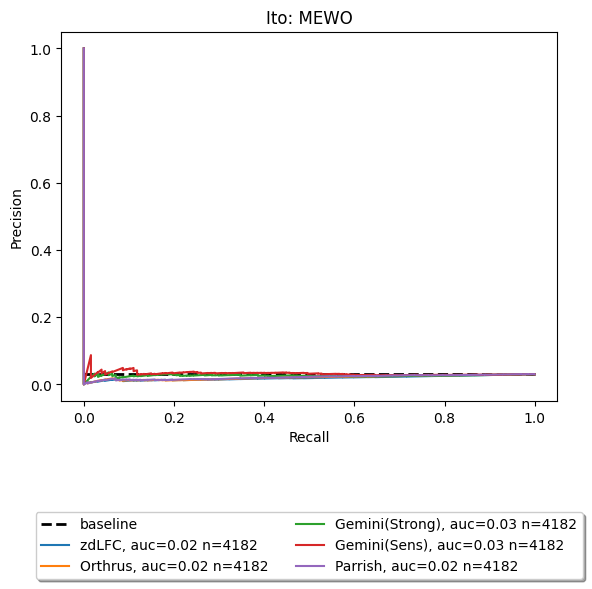

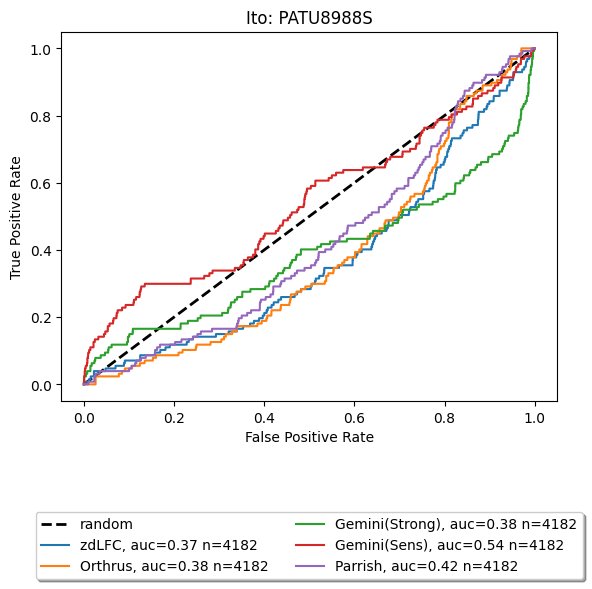

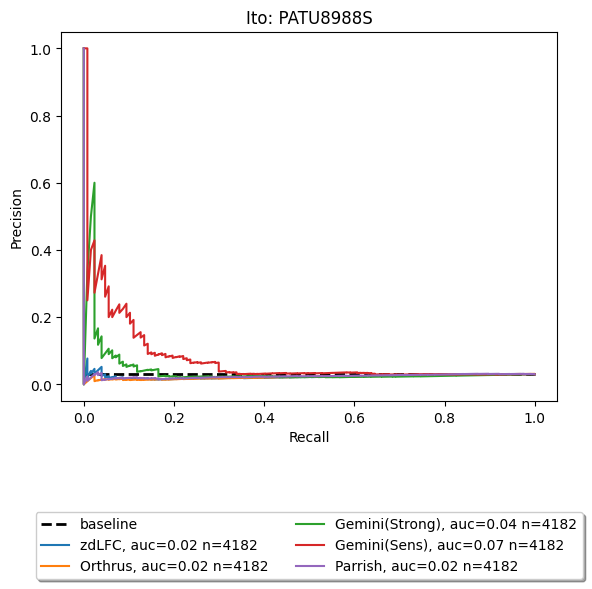

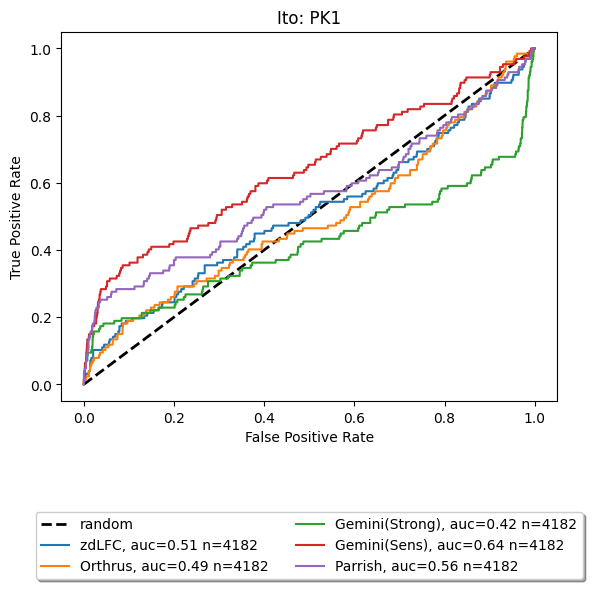

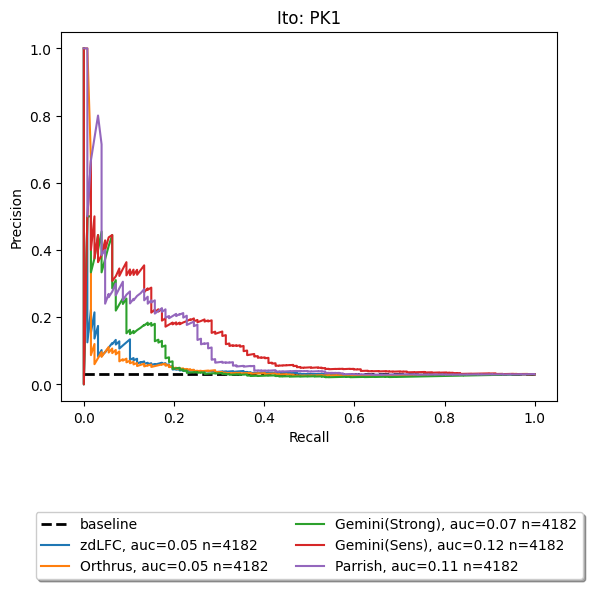

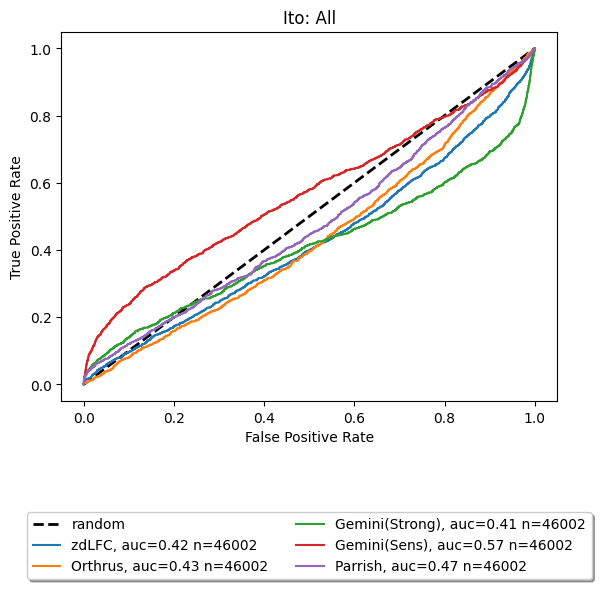

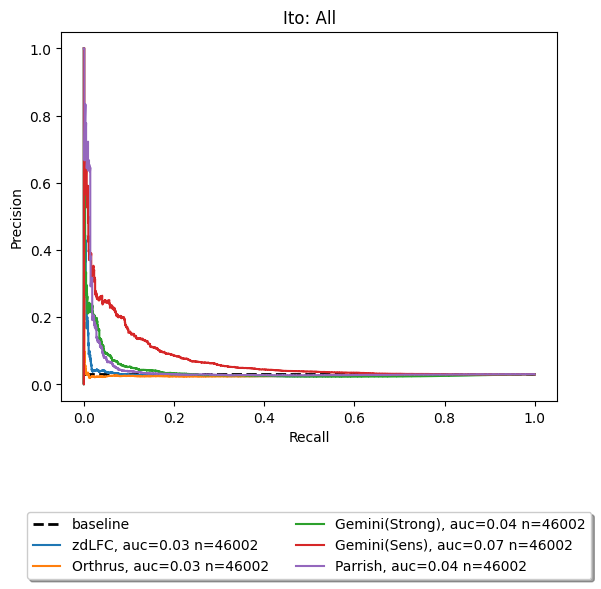

In [25]:
results_ito_A549_Koferle = Cell_Line_Analysis(Ito_A549, 'A549', 'Ito', 
                   scores, Koferle_entrez)
results_ito_Meljuso_Koferle = Cell_Line_Analysis(Ito_Meljuso, 'Meljuso', 'Ito', 
                   scores, Koferle_entrez)
results_ito_GI1_Koferle = Cell_Line_Analysis(Ito_GI1, 'GI1', 'Ito', 
                   scores, Koferle_entrez)
results_ito_HS936T_Koferle = Cell_Line_Analysis(Ito_HS936T, 'HS936T', 'Ito', 
                   scores, Koferle_entrez)
results_ito_HS944T_Koferle = Cell_Line_Analysis(Ito_HS944T, 'HS944T', 'Ito', 
                   scores, Koferle_entrez)
results_ito_HSC5_Koferle = Cell_Line_Analysis(Ito_HSC5, 'HSC5', 'Ito', 
                   scores, Koferle_entrez)
results_ito_IPC298_Koferle = Cell_Line_Analysis(Ito_IPC298, 'IPC298', 'Ito', 
                   scores, Koferle_entrez)
results_ito_MEL202_003_Koferle = Cell_Line_Analysis(Ito_MEL202_003, 'MEL202_003', 'Ito', 
                   scores, Koferle_entrez)
results_ito_MEWO_Koferle = Cell_Line_Analysis(Ito_MEWO, 'MEWO', 'Ito', 
                   scores, Koferle_entrez)
results_ito_PATU8988S_Koferle = Cell_Line_Analysis(Ito_PATU8988S, 'PATU8988S', 'Ito', 
                   scores, Koferle_entrez)
results_ito_PK1_Koferle = Cell_Line_Analysis(Ito_PK1, 'PK1', 'Ito', 
                   scores, Koferle_entrez)


full_list = [results_ito_A549_Koferle, results_ito_Meljuso_Koferle, results_ito_GI1_Koferle,
             results_ito_HS936T_Koferle, results_ito_HS944T_Koferle, results_ito_HSC5_Koferle,
             results_ito_IPC298_Koferle, results_ito_MEL202_003_Koferle, results_ito_MEWO_Koferle, 
             results_ito_PATU8988S_Koferle, results_ito_PK1_Koferle]

roc_Koferle, pr_Koferle = ConvertResultsToDF(full_list )

## Write results to a file
roc_Koferle.to_csv("Output" + filtered + "/Ito_ROC_Koferle.csv", index=False)
pr_Koferle.to_csv("Output" + filtered + "/Ito_PR_Koferle.csv", index=False)


results_ito_all_Koferle = Cell_Line_Analysis(ito_all, 'All', 'Ito', scores, Koferle_entrez)
roc_all_Koferle, pr_all_Koferle  = ConvertResultsToDF([results_ito_all_Koferle] )
## Write results to a file
roc_all_Koferle.to_csv("Output" + filtered + "/Ito_All_ROC_Koferle.csv", index=False)
pr_all_Koferle.to_csv("Output" + filtered+ "/Ito_All_PR_Koferle.csv", index=False)



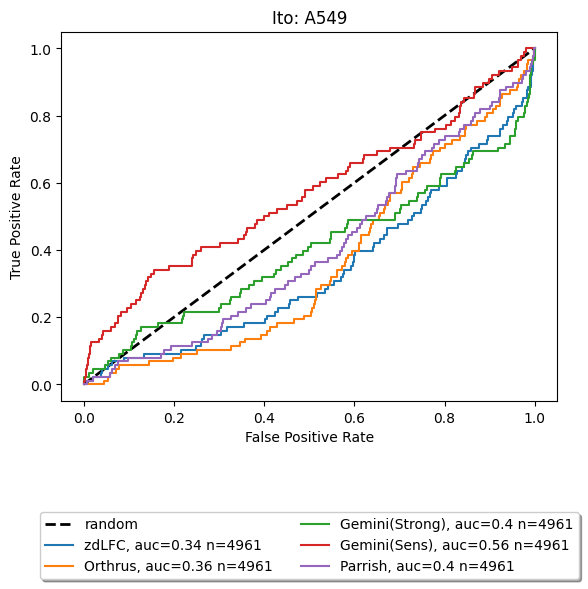

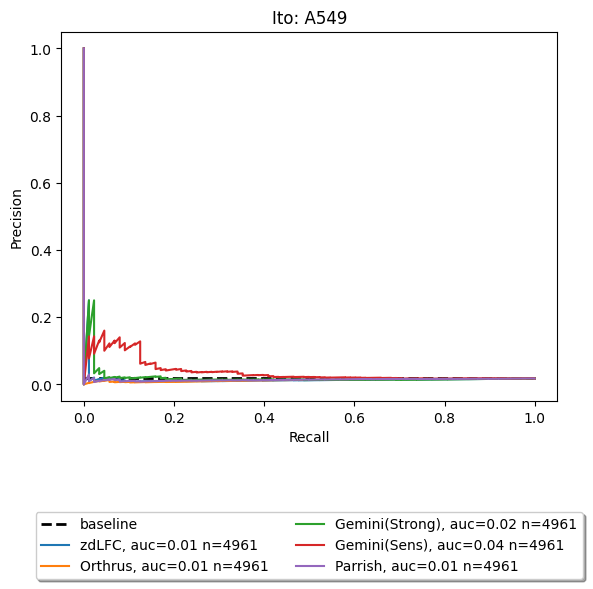

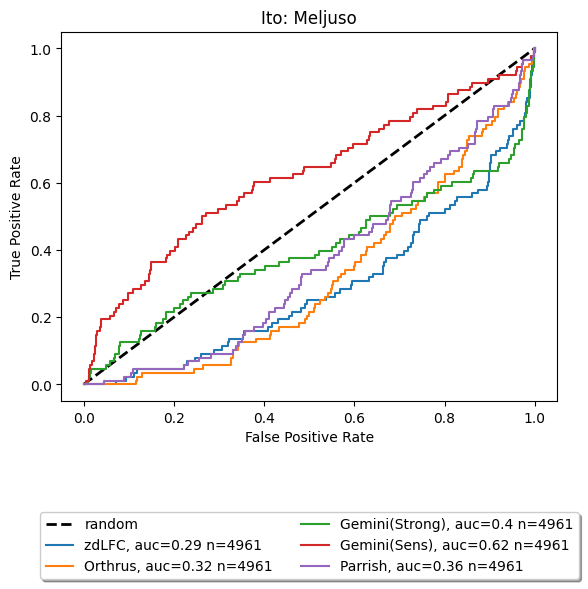

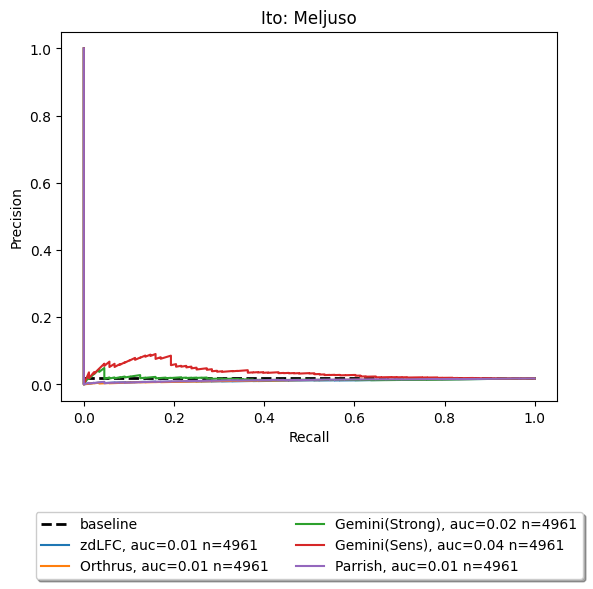

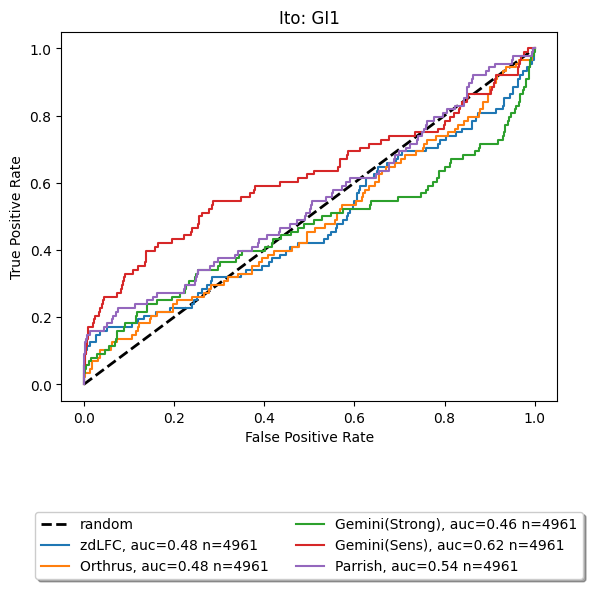

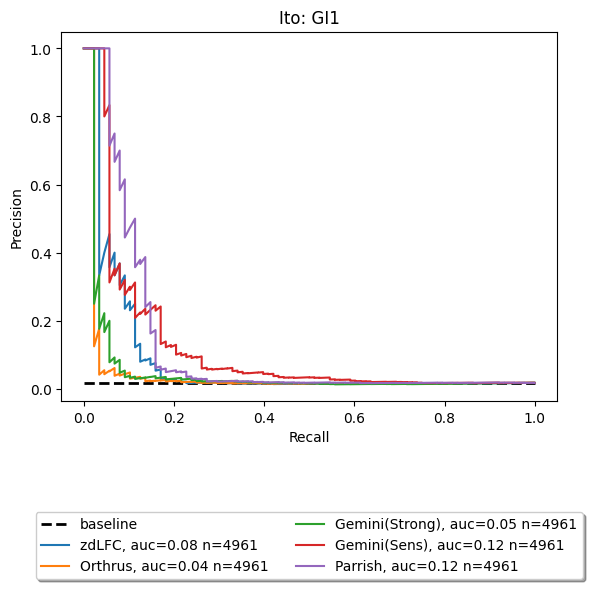

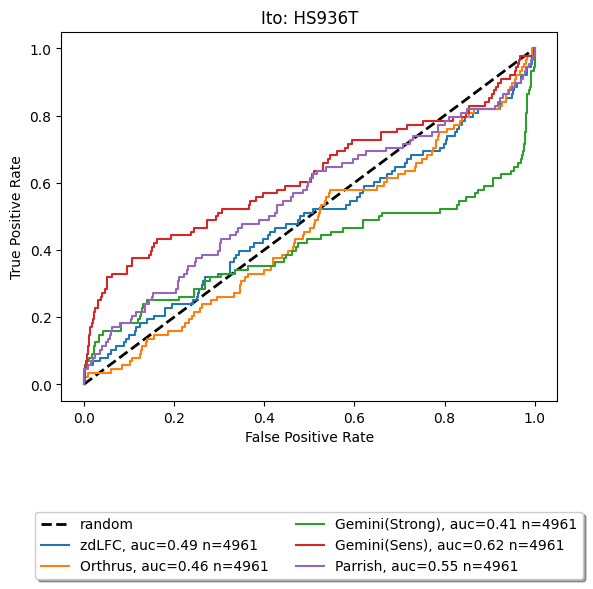

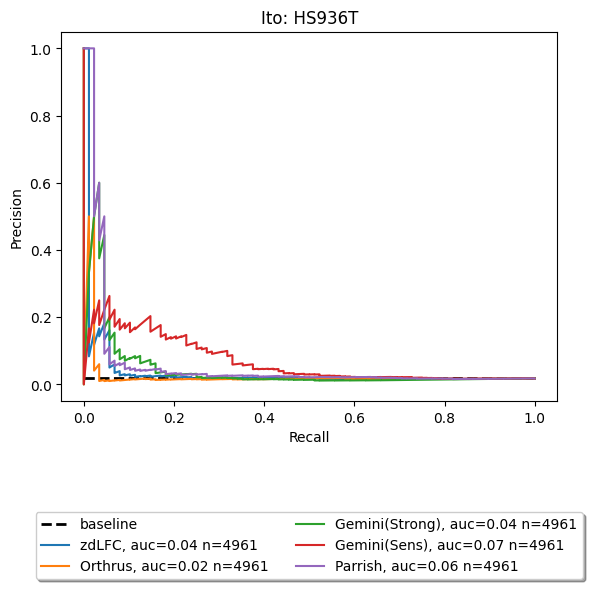

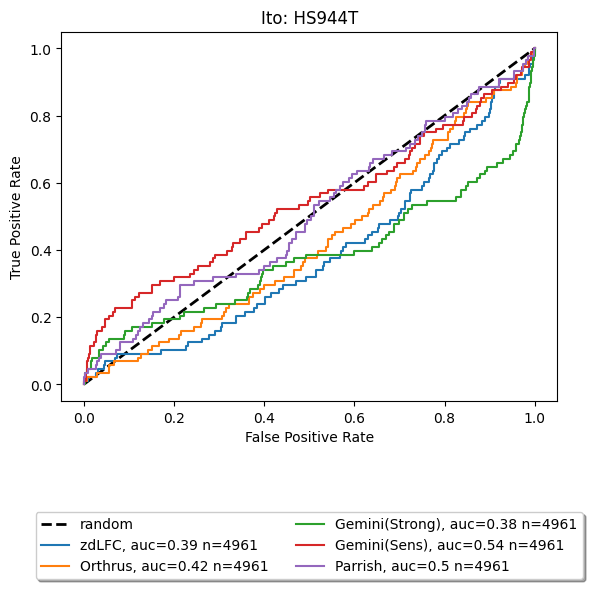

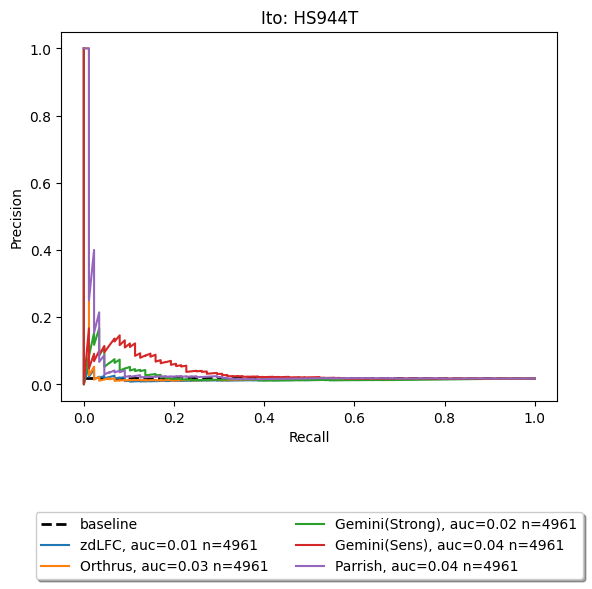

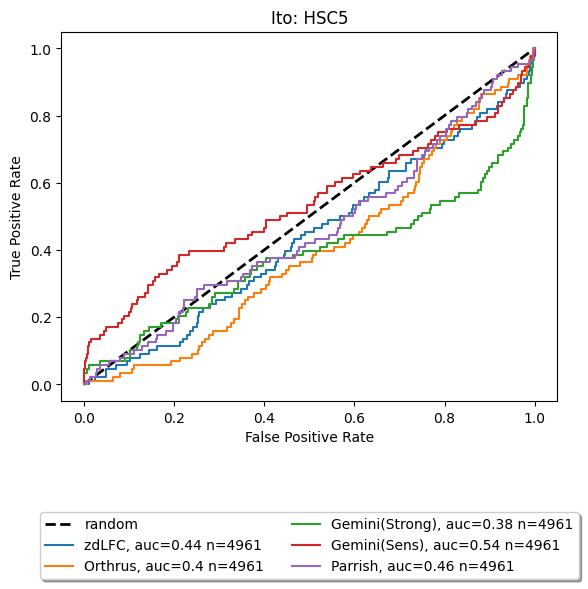

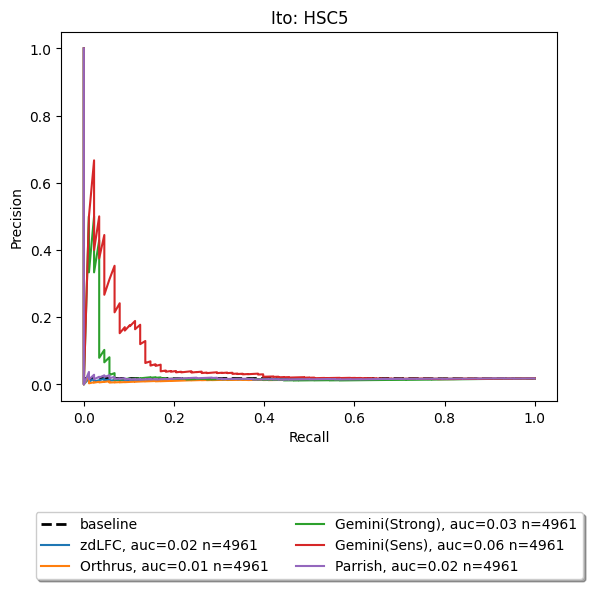

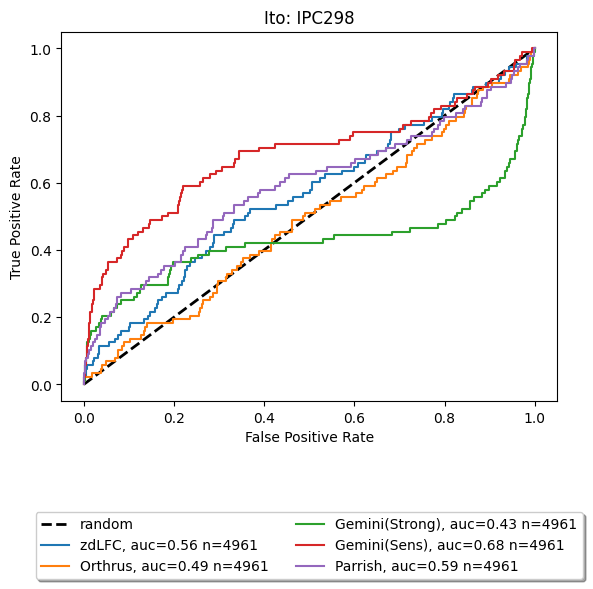

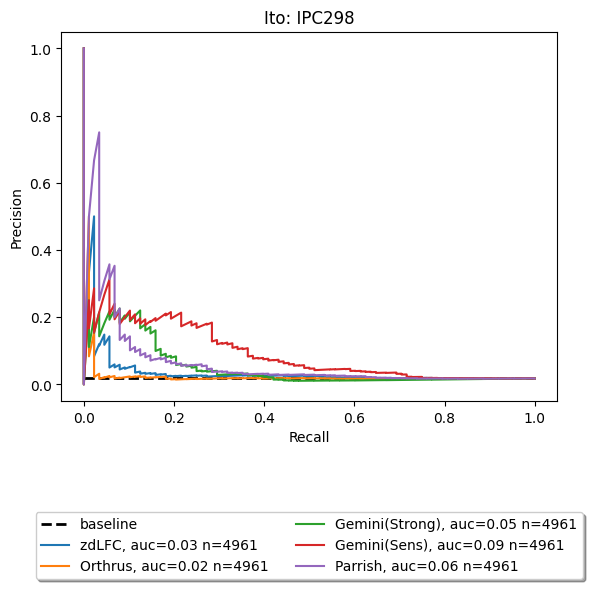

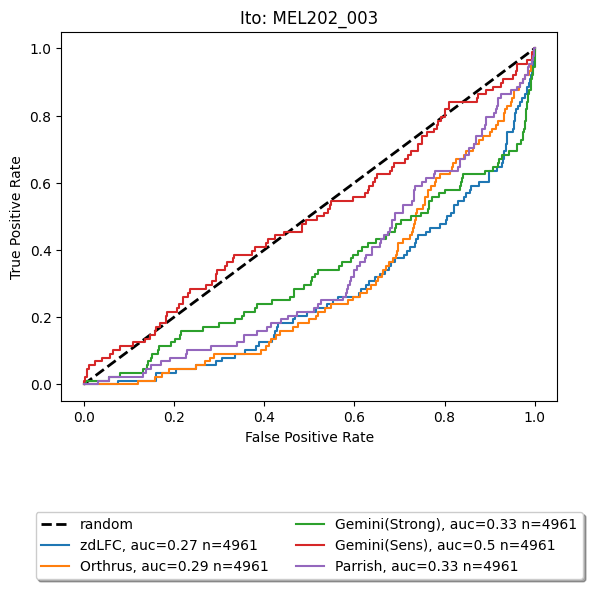

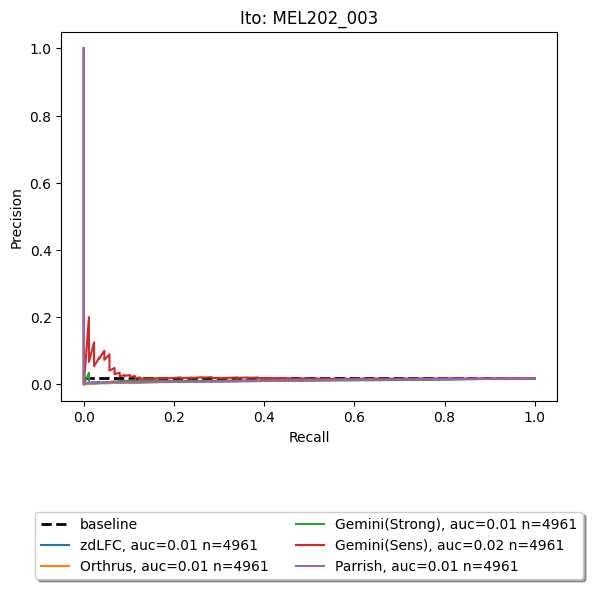

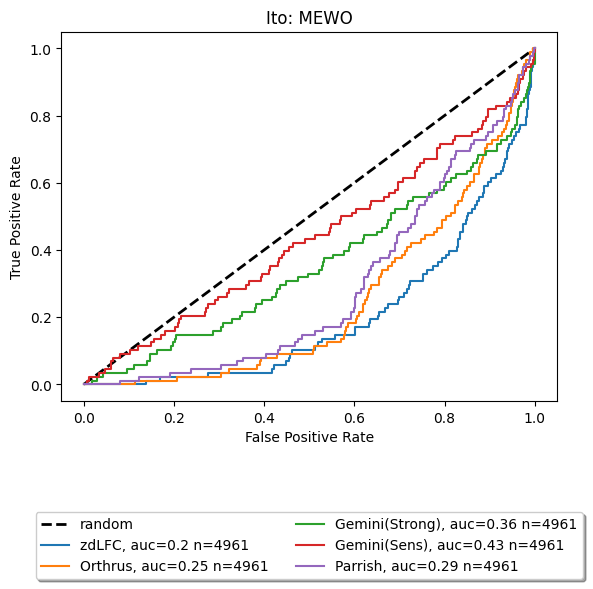

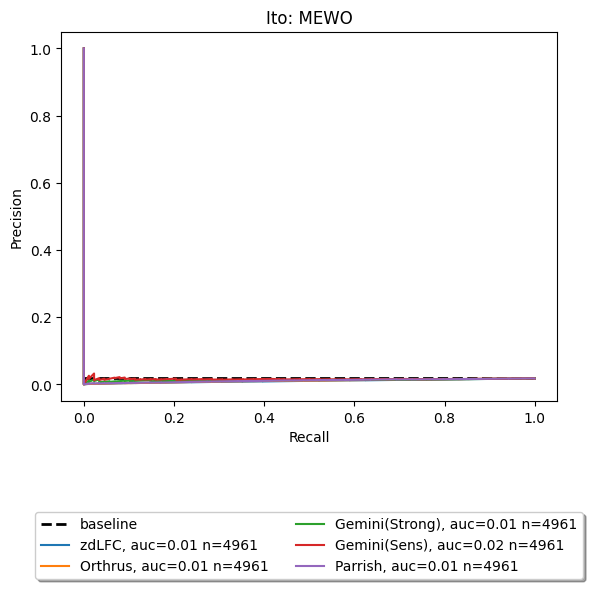

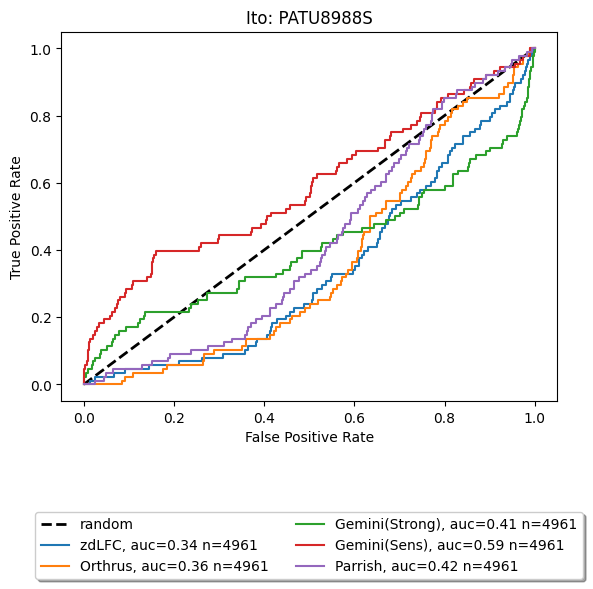

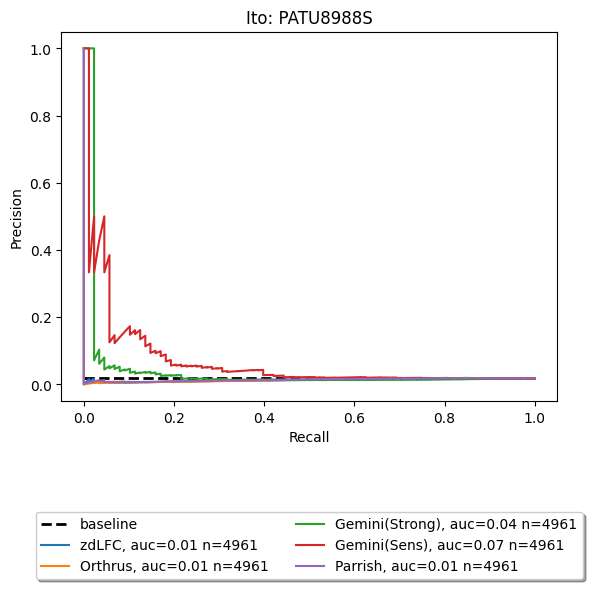

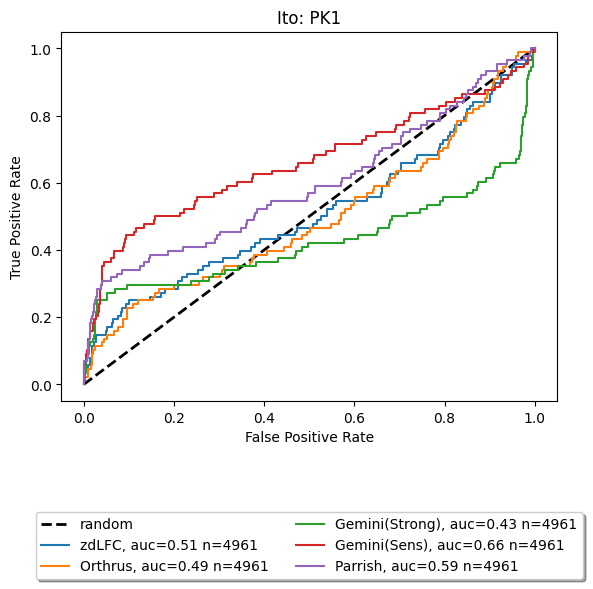

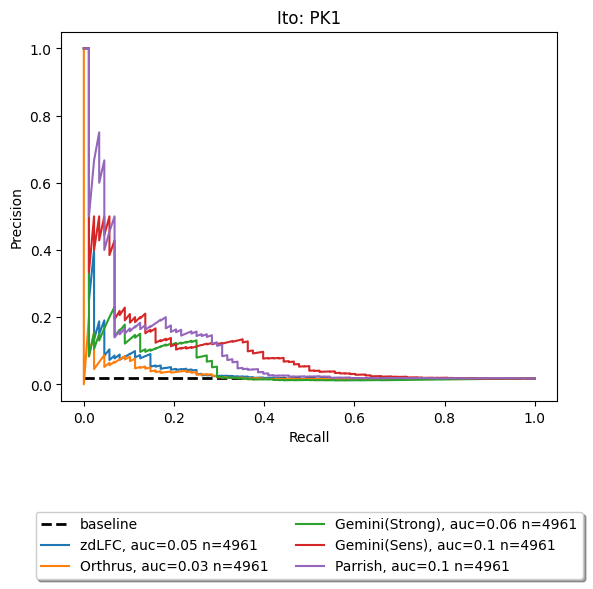

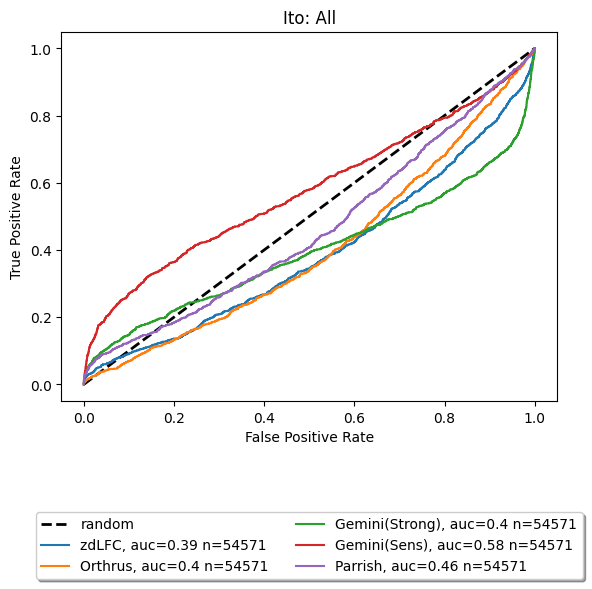

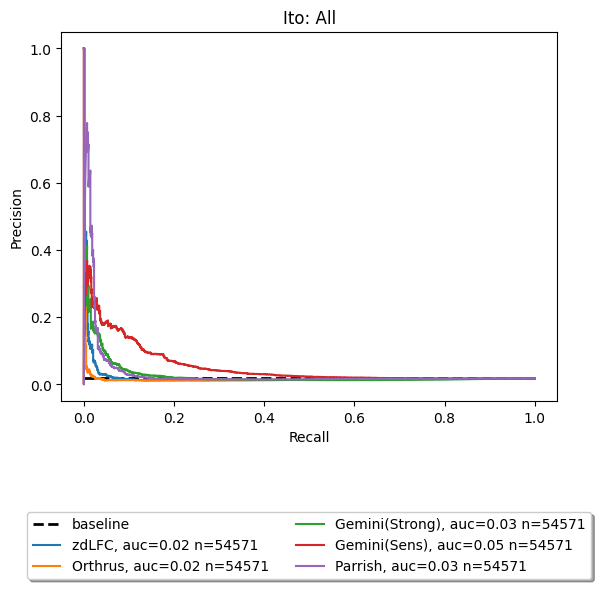

In [26]:
results_ito_A549_bacon = Cell_Line_Analysis_bacon(Ito_A549, 'A549', 'Ito', 
                   scores, Bacon_entrez)
results_ito_Meljuso_bacon = Cell_Line_Analysis_bacon(Ito_Meljuso, 'Meljuso', 'Ito', 
                   scores, Bacon_entrez)
results_ito_GI1_bacon = Cell_Line_Analysis_bacon(Ito_GI1, 'GI1', 'Ito', 
                   scores, Bacon_entrez)
results_ito_HS936T_bacon = Cell_Line_Analysis_bacon(Ito_HS936T, 'HS936T', 'Ito', 
                   scores, Bacon_entrez)
results_ito_HS944T_bacon = Cell_Line_Analysis_bacon(Ito_HS944T, 'HS944T', 'Ito', 
                   scores, Bacon_entrez)
results_ito_HSC5_bacon = Cell_Line_Analysis_bacon(Ito_HSC5, 'HSC5', 'Ito', 
                   scores, Bacon_entrez)
results_ito_IPC298_bacon = Cell_Line_Analysis_bacon(Ito_IPC298, 'IPC298', 'Ito', 
                   scores, Bacon_entrez)
results_ito_MEL202_003_bacon = Cell_Line_Analysis_bacon(Ito_MEL202_003, 'MEL202_003', 'Ito', 
                   scores, Bacon_entrez)
results_ito_MEWO_bacon = Cell_Line_Analysis_bacon(Ito_MEWO, 'MEWO', 'Ito', 
                   scores, Bacon_entrez)
results_ito_PATU8988S_bacon = Cell_Line_Analysis_bacon(Ito_PATU8988S, 'PATU8988S', 'Ito', 
                   scores, Bacon_entrez)
results_ito_PK1_bacon = Cell_Line_Analysis_bacon(Ito_PK1, 'PK1', 'Ito', 
                   scores, Bacon_entrez)


full_list = [results_ito_A549_bacon, results_ito_Meljuso_bacon, results_ito_GI1_bacon,
             results_ito_HS936T_bacon, results_ito_HS944T_bacon, results_ito_HSC5_bacon,
             results_ito_IPC298_bacon, results_ito_MEL202_003_bacon, results_ito_MEWO_bacon, 
             results_ito_PATU8988S_bacon, results_ito_PK1_bacon]

roc_bacon, pr_bacon = ConvertResultsToDF(full_list )

## Write results to a file
roc_bacon.to_csv("Output" + filtered + "/Ito_ROC_bacon.csv", index=False)
pr_bacon.to_csv("Output" + filtered + "/Ito_PR_bacon.csv", index=False)



results_ito_all_bacon = Cell_Line_Analysis_bacon(ito_all, 'All', 'Ito', scores, Bacon_entrez)
roc_all_bacon, pr_all_bacon  = ConvertResultsToDF([results_ito_all_bacon] )
## Write results to a file
roc_all_bacon.to_csv("Output" + filtered + "/Ito_All_ROC_bacon.csv", index=False)
pr_all_bacon.to_csv("Output" + filtered+ "/Ito_All_PR_bacon.csv", index=False)


In [27]:

output_path = "Output" + filtered + "\Comparison"
ito_all.corr(method = "spearman").to_csv(output_path + "\Ito_Correlations.csv")
Ito_A549_J = jaccard_similarity(Ito_A549, 0.95)
Ito_GI1_J = jaccard_similarity(Ito_GI1, 0.95)
Ito_HS936T_J = jaccard_similarity(Ito_HS936T, 0.95)
Ito_HS944T_J = jaccard_similarity(Ito_HS944T, 0.95)
Ito_HSC5_J = jaccard_similarity(Ito_HSC5, 0.95)
Ito_IPC298_J = jaccard_similarity(Ito_IPC298, 0.95)
Ito_MEL202_003_J = jaccard_similarity(Ito_MEL202_003, 0.95)
Ito_Meljuso_J = jaccard_similarity(Ito_Meljuso, 0.95)
Ito_MEWO_J = jaccard_similarity(Ito_MEWO, 0.95)
Ito_PATU8988S_J = jaccard_similarity(Ito_PATU8988S, 0.95)
Ito_PK1_J = jaccard_similarity(Ito_PK1, 0.95)



In [28]:
Ito_A549_J.to_csv(output_path + "\Ito_A549_Jaccard.csv")
Ito_GI1_J.to_csv(output_path + "\Ito_GI1_Jaccard.csv")
Ito_HS936T_J.to_csv(output_path + "\Ito_HS936T_Jaccard.csv")
Ito_HS944T_J.to_csv(output_path + "\Ito_HS944T_Jaccard.csv")
Ito_HSC5_J.to_csv(output_path + "\Ito_HSC5_Jaccard.csv")
Ito_IPC298_J.to_csv(output_path + "\Ito_IPC298_Jaccard.csv")
Ito_MEL202_003_J.to_csv(output_path + "\Ito_MEL202_003_Jaccard.csv")

Ito_Meljuso_J.to_csv(output_path + "\Ito_Meljuso_Jaccard.csv")# = jaccard_similarity(Ito_Meljuso, 0.95)
Ito_MEWO_J.to_csv(output_path + "\Ito_MEWO_Jaccard.csv") #= jaccard_similarity(Ito_MEWO, 0.95)
Ito_PATU8988S_J.to_csv(output_path + "\Ito_PATU8988S_Jaccard.csv") # = jaccard_similarity(Ito_PATU8988S, 0.95)
Ito_PK1_J.to_csv(output_path + "\Ito_PK2_Jaccard.csv") #= jaccard_similarity(Ito_PK1, 0.95)

Ito_Jaccard = (Ito_A549_J + Ito_GI1_J + Ito_HS936T_J + Ito_HS944T_J + Ito_HSC5_J + Ito_IPC298_J + 
    Ito_MEL202_003_J + Ito_Meljuso_J + Ito_MEWO_J + Ito_PATU8988S_J + Ito_PK1_J )/11
Ito_Jaccard.to_csv(output_path + "\Ito_Jaccard.csv")

Best AUROC Method: Gemini(Sens)
Best AUPR Method: Gemini(Sens)


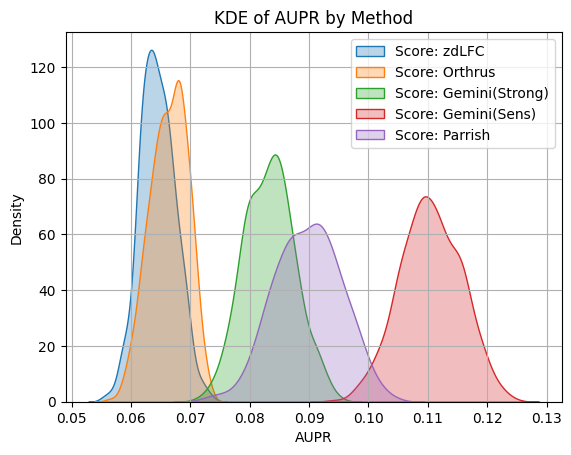

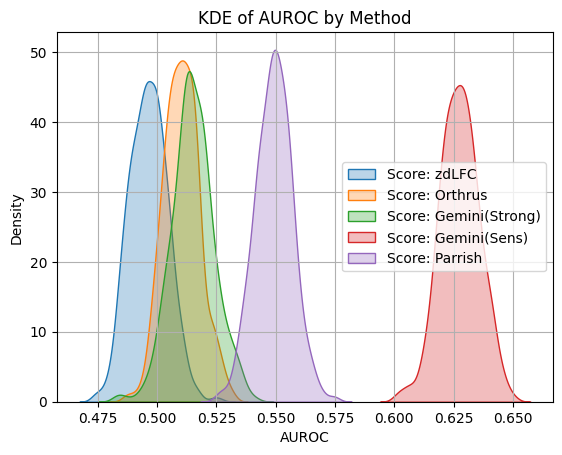

method        p_value            fdr     bonferroni  \
0  Gemini(Strong)   0.000000e+00   0.000000e+00   0.000000e+00   
1         Orthrus   0.000000e+00   0.000000e+00   0.000000e+00   
3           zdLFC   0.000000e+00   0.000000e+00   0.000000e+00   
2         Parrish  1.551962e-314  1.551962e-314  6.207847e-314   

   significant_bh  signicant_bonferroni  
0            True                  True  
1            True                  True  
3            True                  True  
2            True                  True

method  p_value  fdr  bonferroni  significant_bh  \
0  Gemini(Strong)      0.0  0.0         0.0            True   
1         Orthrus      0.0  0.0         0.0            True   
2         Parrish      0.0  0.0         0.0            True   
3           zdLFC      0.0  0.0         0.0            True   

   signicant_bonferroni  
0                  True  
1                  True  
2                  True  
3                  True

Best AUROC Method: Gemini(Sens)
Best AUPR Method: Gemini(Sens)


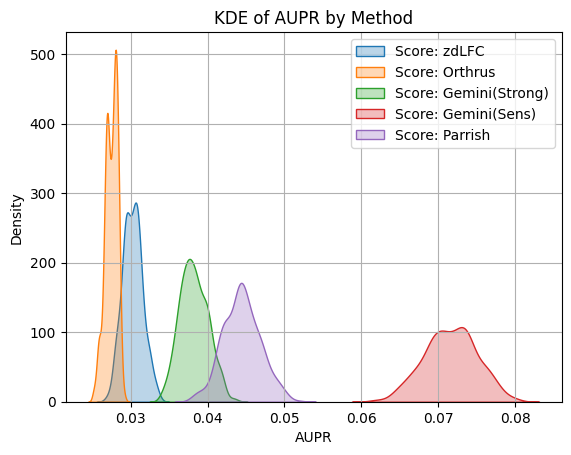

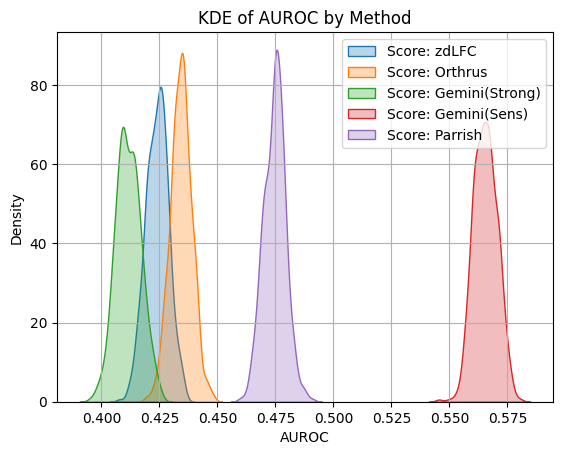

method  p_value  fdr  bonferroni  significant_bh  \
0  Gemini(Strong)      0.0  0.0         0.0            True   
1         Orthrus      0.0  0.0         0.0            True   
2         Parrish      0.0  0.0         0.0            True   
3           zdLFC      0.0  0.0         0.0            True   

   signicant_bonferroni  
0                  True  
1                  True  
2                  True  
3                  True

method  p_value  fdr  bonferroni  significant_bh  \
0  Gemini(Strong)      0.0  0.0         0.0            True   
1         Orthrus      0.0  0.0         0.0            True   
2         Parrish      0.0  0.0         0.0            True   
3           zdLFC      0.0  0.0         0.0            True   

   signicant_bonferroni  
0                  True  
1                  True  
2                  True  
3                  True

In [29]:
results, aupr_test, auroc_test = Resampling_analysis(ito_all, 'All', 'Ito', scores, ground_truth_depmap_hit_entrez , n_repeats=500, frac=0.75)
display(aupr_test)
display(auroc_test)
results, aupr_test, auroc_test = Resampling_analysis(ito_all, 'All', 'Ito', scores, Koferle_entrez , n_repeats=500, frac=0.75)
display(aupr_test)
display(auroc_test)